/var/folders/n8/pd7j7g0j3673x8rwthf6b1dh0000gn/T/ipykernel_38853/2711602613.py:6: DtypeWarning: Columns (0,1,5,10,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ETDs_sept23.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544592 entries, 0 to 544591
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      544583 non-null  object 
 1   id              544120 non-null  object 
 2   title           544089 non-null  object 
 3   author          544009 non-null  object 
 4   advisor         424034 non-null  object 
 5   year            477127 non-null  object 
 6   abstract        443570 non-null  object 
 7   university      534024 non-null  object 
 8   degree          427596 non-null  object 
 9   URI             542715 non-null  object 
 10  department      298718 non-null  object 
 11  discipline      376499 non-null  object 
 12  language        499467 non-null  object 
 13  schooltype      458032 non-null  object 
 14  oadsclassifier  544105 non-null  float64
 15  borndigital     544105 non-null  float64
dtypes: float64(2), object(14)
memory usage: 66.5+ MB
None
  

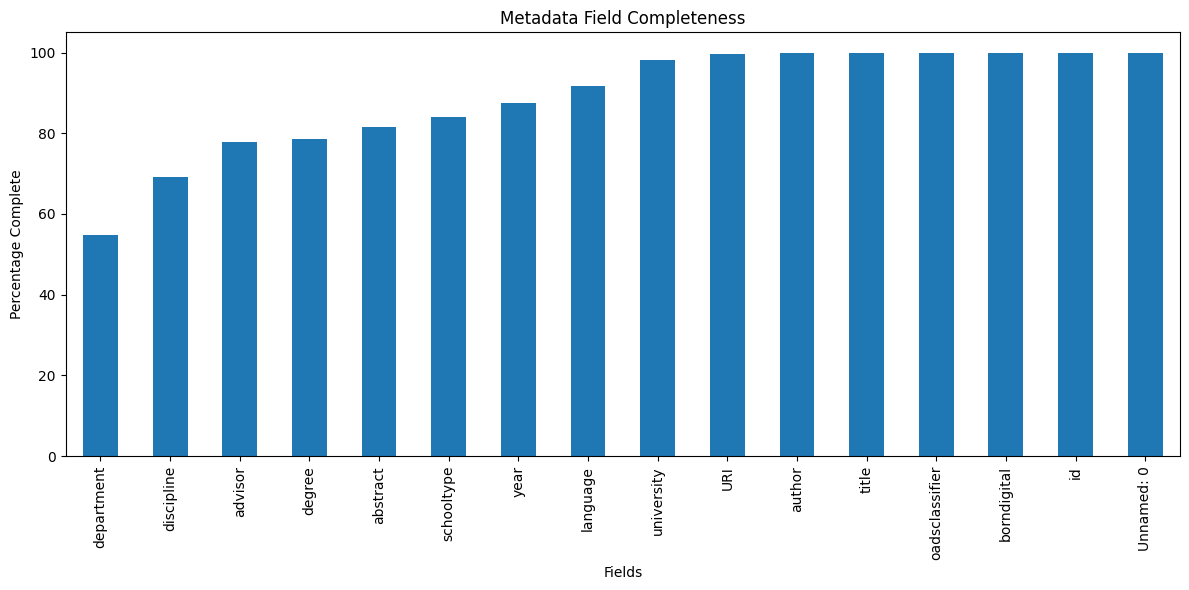


Summary Statistics:
       oadsclassifier    borndigital
count   544105.000000  544105.000000
mean         0.051894       0.266699
std          0.221814       0.442234
min          0.000000       0.000000
25%          0.000000       0.000000
50%          0.000000       0.000000
75%          0.000000       1.000000
max          1.000000       1.000000


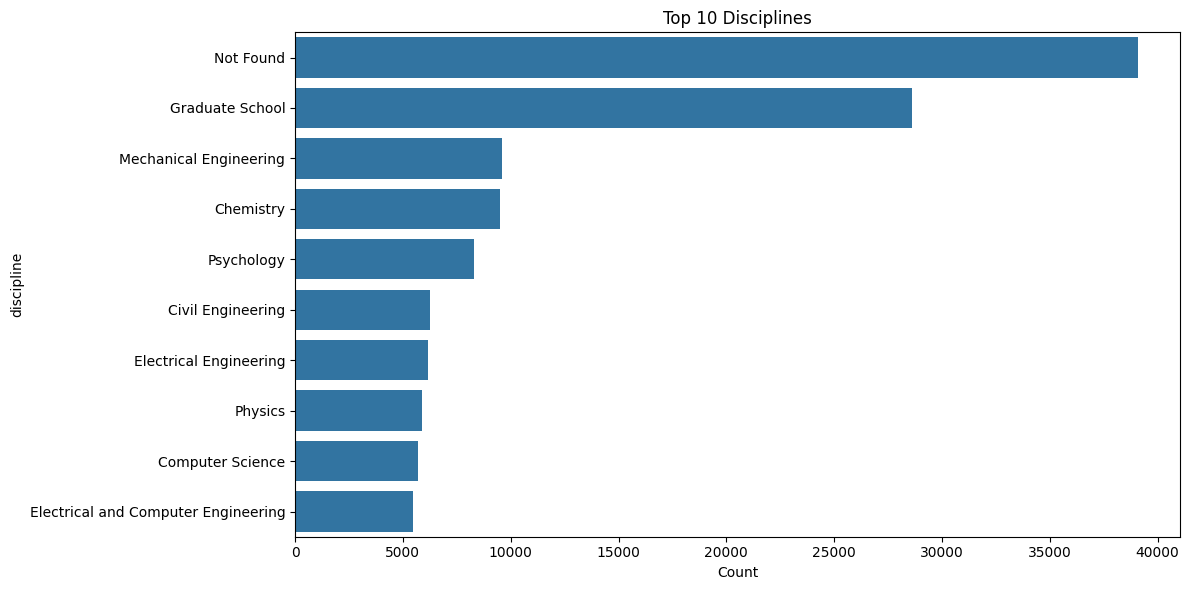

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

# Load the data
df = pd.read_csv('ETDs_sept23.csv')

# Display basic information about the dataset
print(df.info())

# Show the first few rows
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values:\n", missing_values)

# Calculate metadata completeness
completeness = (df.count() / len(df)) * 100

# Visualize completeness
plt.figure(figsize=(12, 6))
completeness.sort_values().plot(kind='bar')
plt.title('Metadata Field Completeness')
plt.ylabel('Percentage Complete')
plt.xlabel('Fields')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# If you have a 'submission_date' column, let's analyze submission trends
if 'submission_date' in df.columns:
    df['submission_date'] = pd.to_datetime(df['submission_date'])
    df['submission_year'] = df['submission_date'].dt.year
    
    yearly_submissions = df['submission_year'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 6))
    yearly_submissions.plot(kind='line', marker='o')
    plt.title('Number of ETD Submissions by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Submissions')
    plt.grid(True)
    plt.show()

# If you have a 'subject' or 'discipline' column, let's analyze subject distribution
subject_column = next((col for col in df.columns if col.lower() in ['subject', 'discipline']), None)
if subject_column:
    top_subjects = df[subject_column].value_counts().head(10)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_subjects.values, y=top_subjects.index)
    plt.title(f'Top 10 {subject_column.capitalize()}s')
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()

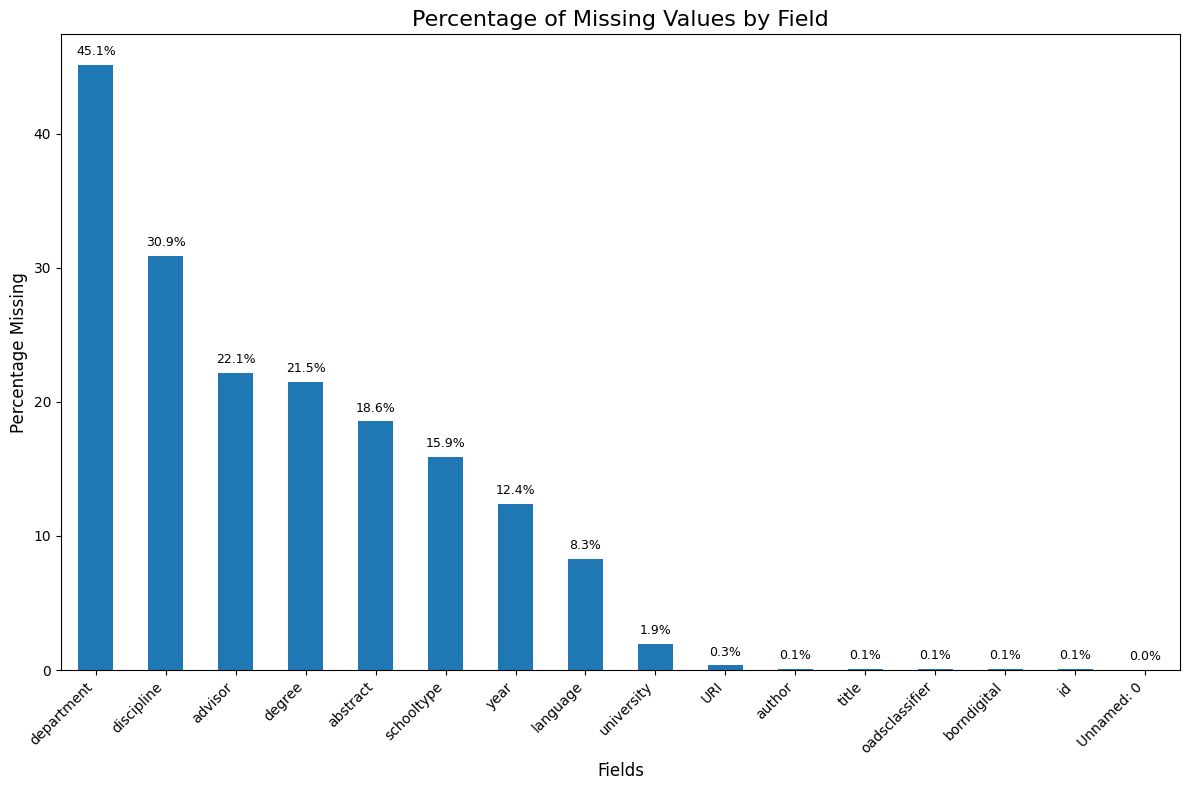

department        45.148295
discipline        30.865859
advisor           22.137306
degree            21.483239
abstract          18.550034
schooltype        15.894468
year              12.388173
language           8.286020
university         1.940535
URI                0.344662
author             0.107053
title              0.092363
oadsclassifier     0.089425
borndigital        0.089425
id                 0.086670
Unnamed: 0         0.001653
dtype: float64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Sort the missing percentages in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
missing_percentage_sorted.plot(kind='bar')

plt.title('Percentage of Missing Values by Field', fontsize=16)
plt.ylabel('Percentage Missing', fontsize=12)
plt.xlabel('Fields', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add percentage labels on top of each bar
for i, v in enumerate(missing_percentage_sorted):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print the percentages
print(missing_percentage_sorted)

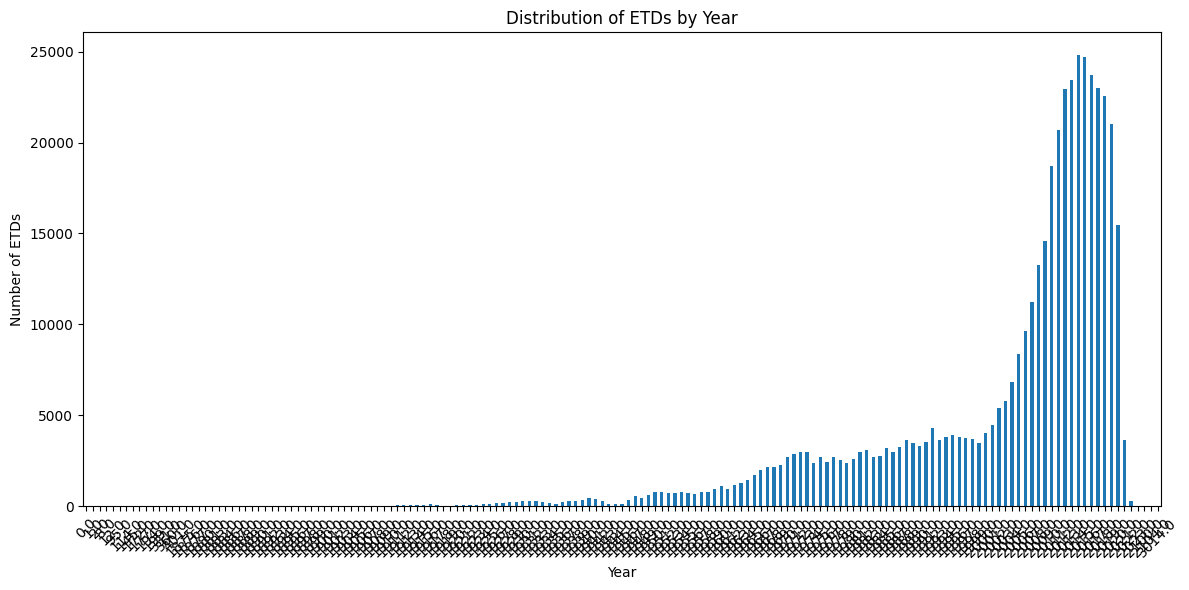

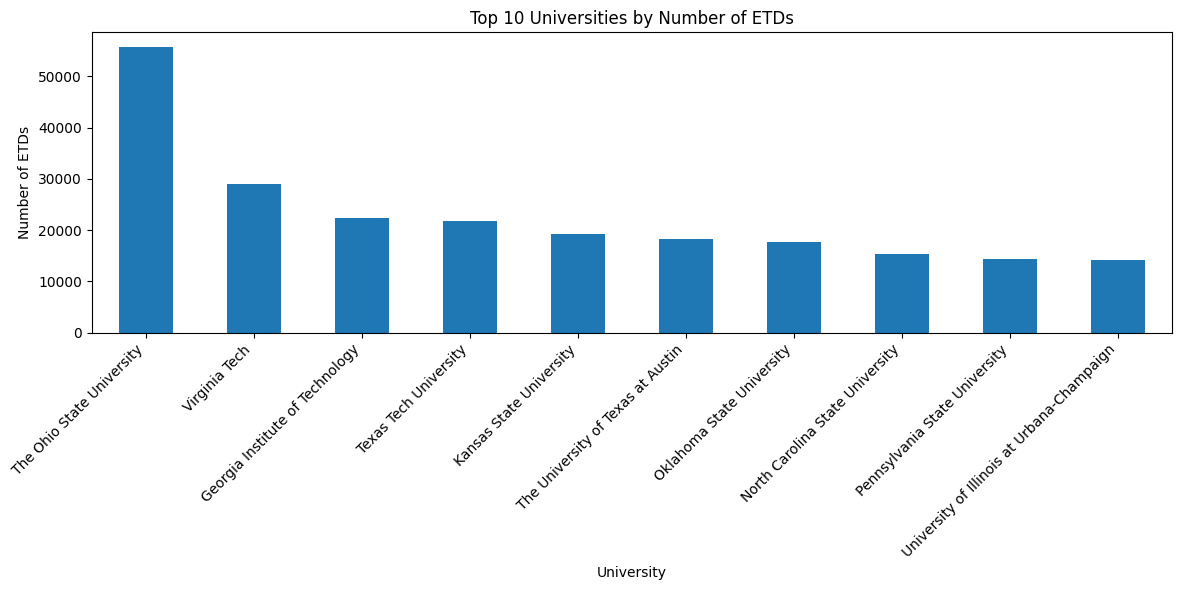

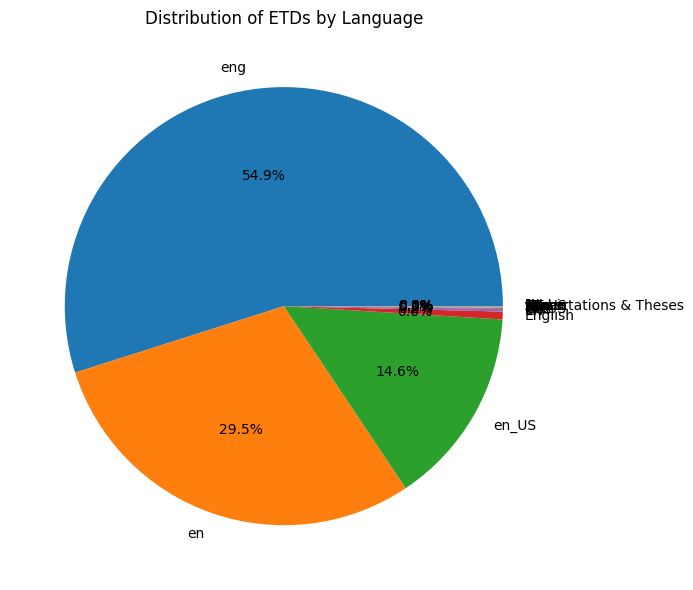

language
eng                       274239
en                        147260
en_US                      73140
English                     2862
EN                          1018
en-US                        347
spa                          200
fre                          127
es                           111
ger                           49
fr                            34
de                            19
deu                           18
Dissertations & Theses        11
haw                            7
SP                             5
other                          3
it                             2
es_US                          2
pt                             2
sp                             1
por                            1
esp                            1
US_en                          1
fra                            1
FR                             1
GE                             1
ES                             1
new                            1
tur                            1
A

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (assuming it's already loaded as df)

# Convert year to numeric, handling errors
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Distribution by year
year_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar')
plt.title('Distribution of ETDs by Year')
plt.xlabel('Year')
plt.ylabel('Number of ETDs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 universities
top_universities = df['university'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_universities.plot(kind='bar')
plt.title('Top 10 Universities by Number of ETDs')
plt.xlabel('University')
plt.ylabel('Number of ETDs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Language distribution
language_counts = df['language'].value_counts()
plt.figure(figsize=(10, 6))
language_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of ETDs by Language')
plt.ylabel('')
plt.tight_layout()
plt.show()

print(language_counts)

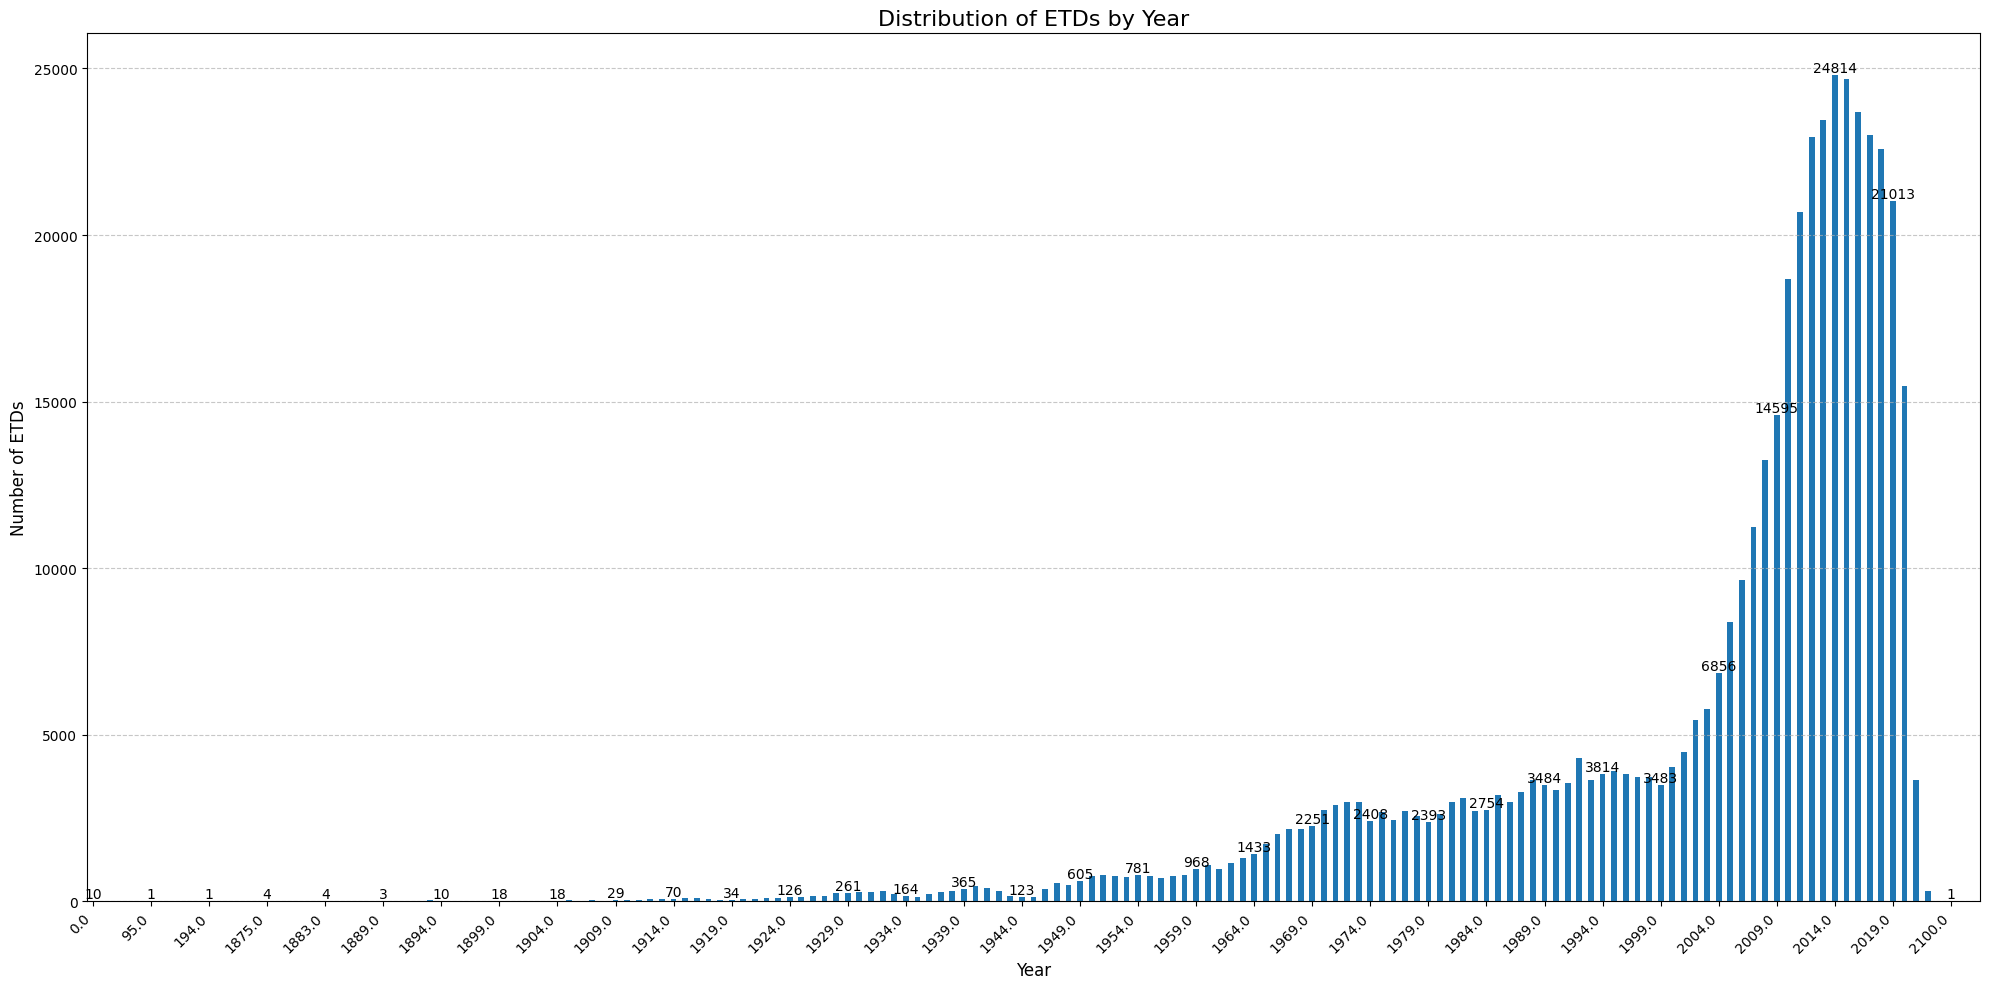

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(20, 10))  # Increased figure size for better visibility
ax = year_counts.plot(kind='bar')

plt.title('Distribution of ETDs by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of ETDs', fontsize=12)

# Rotate x-axis labels and set them to appear only every 5 years
plt.xticks(range(0, len(year_counts), 5), [year_counts.index[i] for i in range(0, len(year_counts), 5)], rotation=45, ha='right')

# Add more space at the bottom to prevent cutting off labels
plt.subplots_adjust(bottom=0.2)

# Add gridlines for easier reading
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optionally, add value labels on top of each bar
for i, v in enumerate(year_counts):
    if i % 5 == 0:  # Only label every 5th bar to reduce clutter
        ax.text(i, v, str(v), ha='center', va='bottom')


plt.tight_layout()
plt.show()

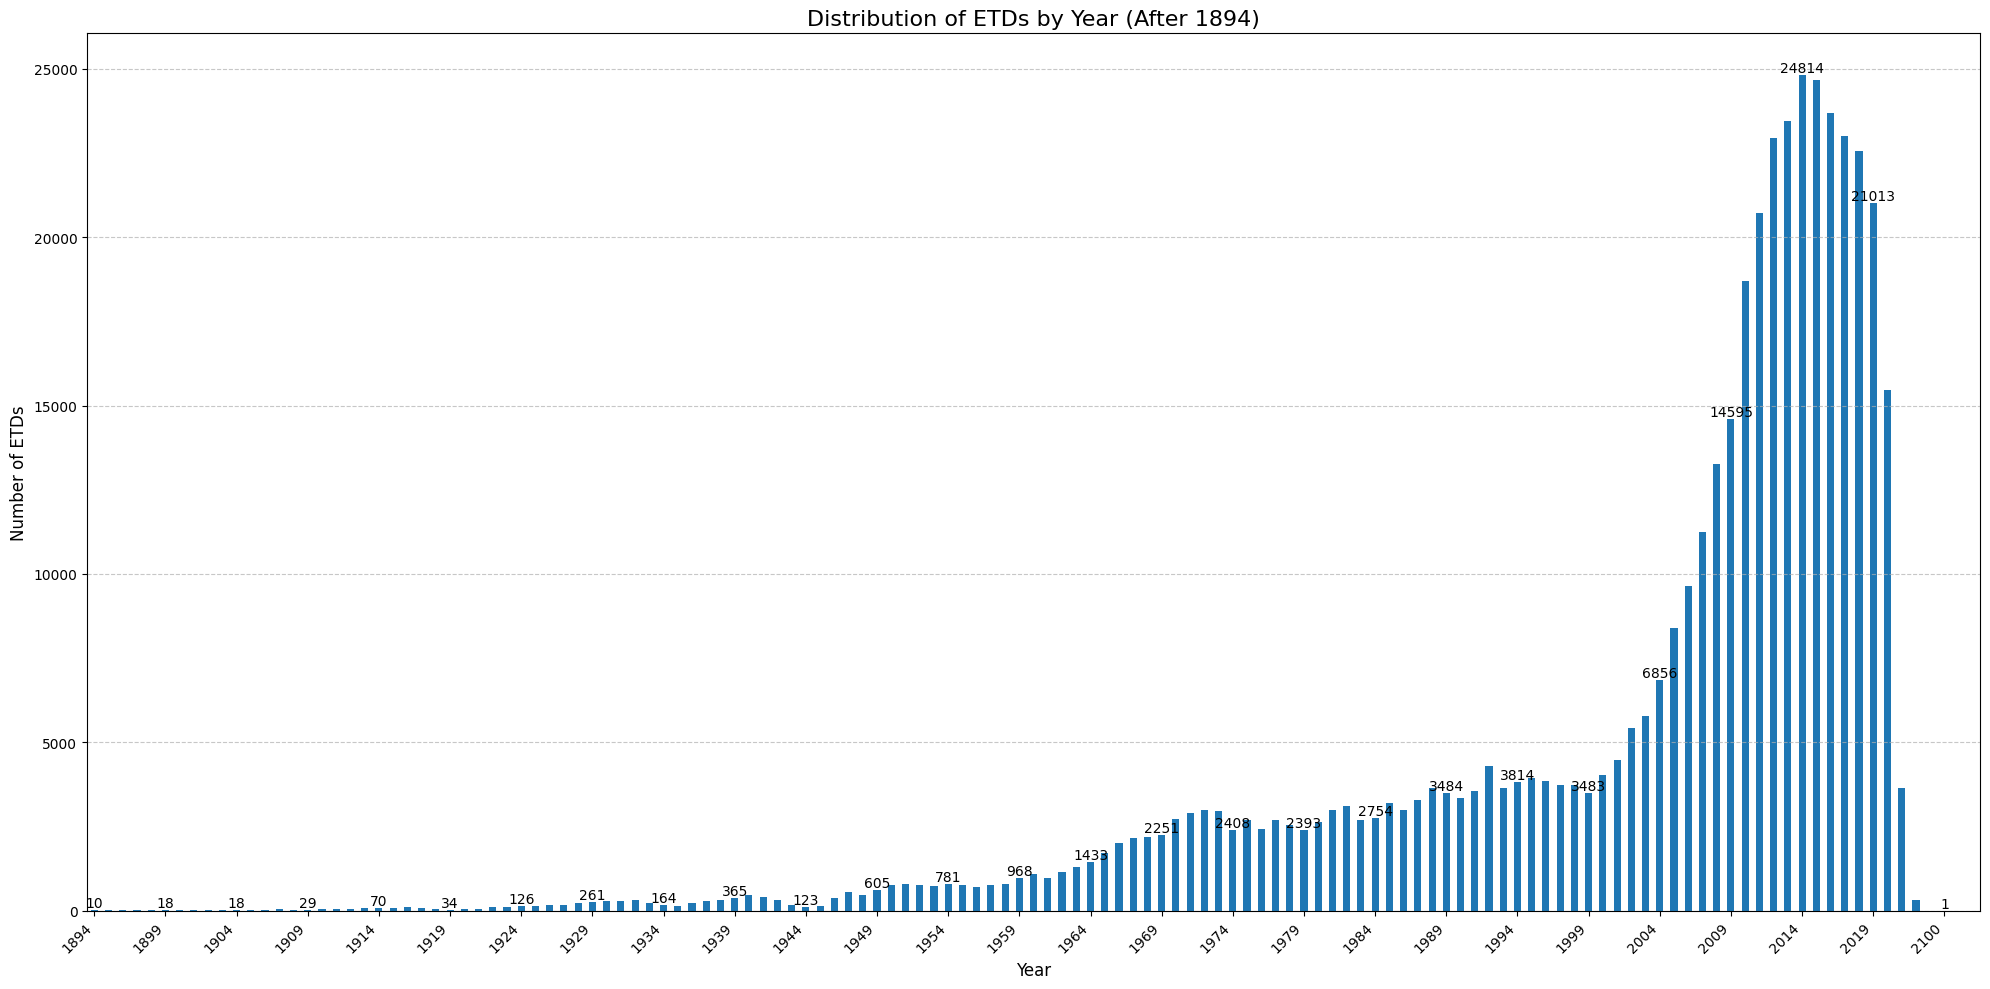

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Convert year to integer and filter for years 1894 and later
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')
year_counts = df[df['year'] >= 1894]['year'].value_counts().sort_index()

plt.figure(figsize=(20, 10))
ax = year_counts.plot(kind='bar')

plt.title('Distribution of ETDs by Year (After 1894)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of ETDs', fontsize=12)

# Set x-ticks to show every 5 years
tick_positions = range(0, len(year_counts), 5)
tick_labels = [str(year_counts.index[i]) for i in tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')

plt.subplots_adjust(bottom=0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Add value labels on top of each bar for years divisible by 10
# for i, (year, count) in enumerate(year_counts.items()):
#     if year % 10 == 0:
#         ax.text(i, count, str(count), ha='center', va='bottom', fontsize=8)

# Optionally, add value labels on top of each bar
for i, v in enumerate(year_counts):
    if i % 5 == 0:  # Only label every 5th bar to reduce clutter
        ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

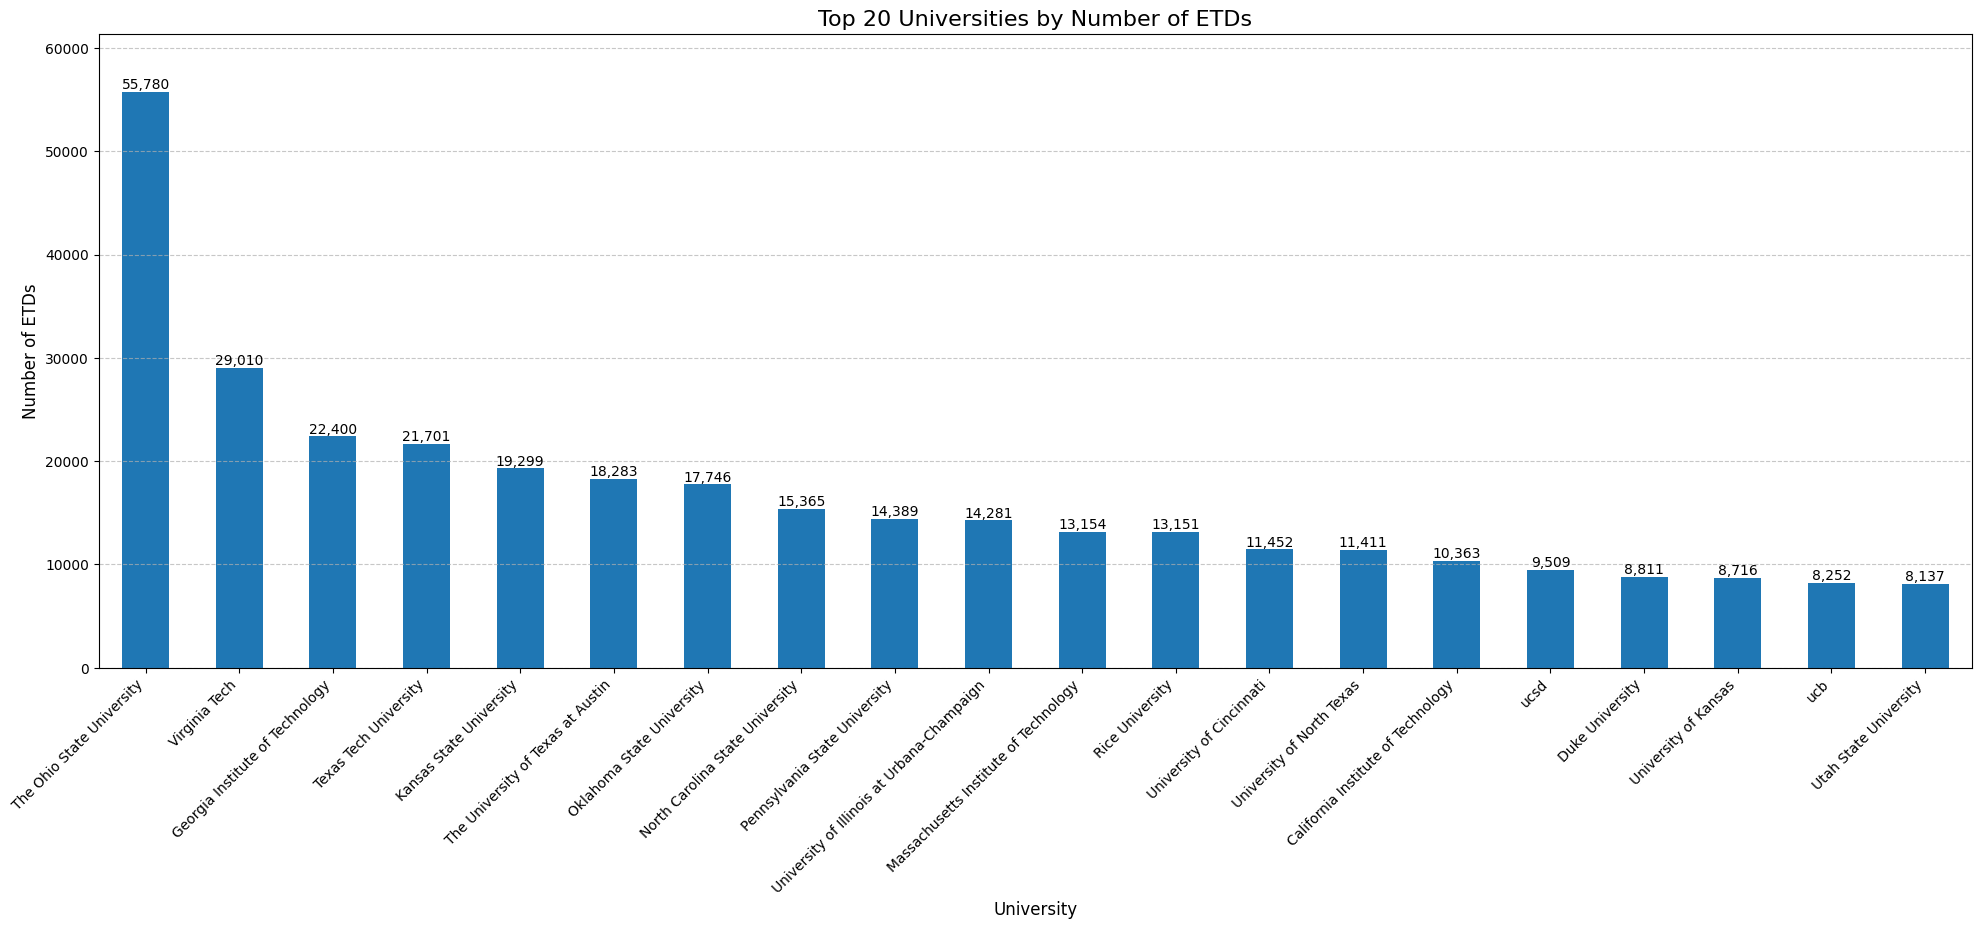

university
The Ohio State University                     55780
Virginia Tech                                 29010
Georgia Institute of Technology               22400
Texas Tech University                         21701
Kansas State University                       19299
The University of Texas at Austin             18283
Oklahoma State University                     17746
North Carolina State University               15365
Pennsylvania State University                 14389
University of Illinois at Urbana-Champaign    14281
Massachusetts Institute of Technology         13154
Rice University                               13151
University of Cincinnati                      11452
University of North Texas                     11411
California Institute of Technology            10363
ucsd                                           9509
Duke University                                8811
University of Kansas                           8716
ucb                                            8252
U

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Get top 20 universities
top_universities = df['university'].value_counts().head(20)

plt.figure(figsize=(20, 10))
ax = top_universities.plot(kind='bar')

plt.title('Top 20 Universities by Number of ETDs', fontsize=16)
plt.xlabel('University', fontsize=12)
plt.ylabel('Number of ETDs', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(top_universities):
    ax.text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=10)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Add some extra space at the top for the labels
plt.subplots_adjust(top=0.9)

# Increase y-axis limit slightly to accommodate labels
plt.ylim(0, max(top_universities) * 1.1) 

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the data
print(top_universities)

# Print total number of unique subjects
print(f"\nTotal number of unique subjects: {df[subject_column].nunique()}")

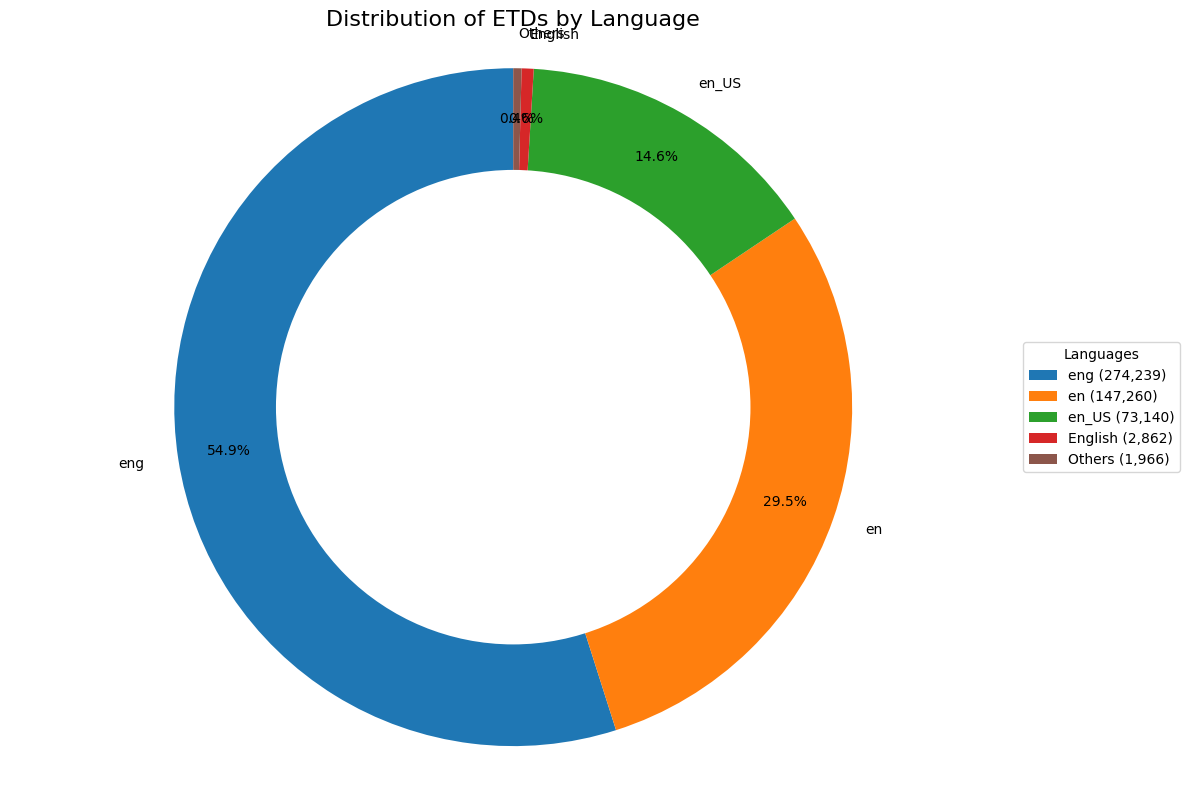

eng        274239
en         147260
en_US       73140
English      2862
Others       1966
dtype: int64


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
language_counts = df['language'].value_counts()

# Get top 4 languages
top_4 = language_counts.head(4)

# Sum up the rest as 'Others'
others = pd.Series({'Others': language_counts[4:].sum()})

# Combine top 4 and others
plot_data = pd.concat([top_4, others])

# Create color map
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#8c564b']

plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(plot_data, 
                                   labels=plot_data.index, 
                                   autopct='%1.1f%%',
                                   colors=colors,
                                   startangle=90,
                                   pctdistance=0.85)

# Add a circle at the center to create a donut chart (optional)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of ETDs by Language', fontsize=16)

# Add legend with counts
legend_labels = [f'{label} ({count:,})' for label, count in plot_data.items()]
plt.legend(wedges, legend_labels, title="Languages", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.tight_layout()
plt.show()

# Print the data
print(plot_data)

In [13]:
import pandas as pd
from tabulate import tabulate

# Assuming df is your dataframe
language_counts = df['language'].value_counts().reset_index()
language_counts.columns = ['Language', 'Count']

# Calculate total number of different languages
total_languages = len(language_counts)

# Create the markdown table
markdown_table = tabulate(language_counts, headers='keys', tablefmt='pipe', showindex=False)

# Print the markdown table
print("## Language Distribution Table")
print(markdown_table)

print(f"\nTotal number of different languages: {total_languages}")

## Language Distribution Table
| Language               |   Count |
|:-----------------------|--------:|
| eng                    |  274239 |
| en                     |  147260 |
| en_US                  |   73140 |
| English                |    2862 |
| EN                     |    1018 |
| en-US                  |     347 |
| spa                    |     200 |
| fre                    |     127 |
| es                     |     111 |
| ger                    |      49 |
| fr                     |      34 |
| de                     |      19 |
| deu                    |      18 |
| Dissertations & Theses |      11 |
| haw                    |       7 |
| SP                     |       5 |
| other                  |       3 |
| it                     |       2 |
| es_US                  |       2 |
| pt                     |       2 |
| sp                     |       1 |
| por                    |       1 |
| esp                    |       1 |
| US_en                  |       1 |
| fra  

In [12]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


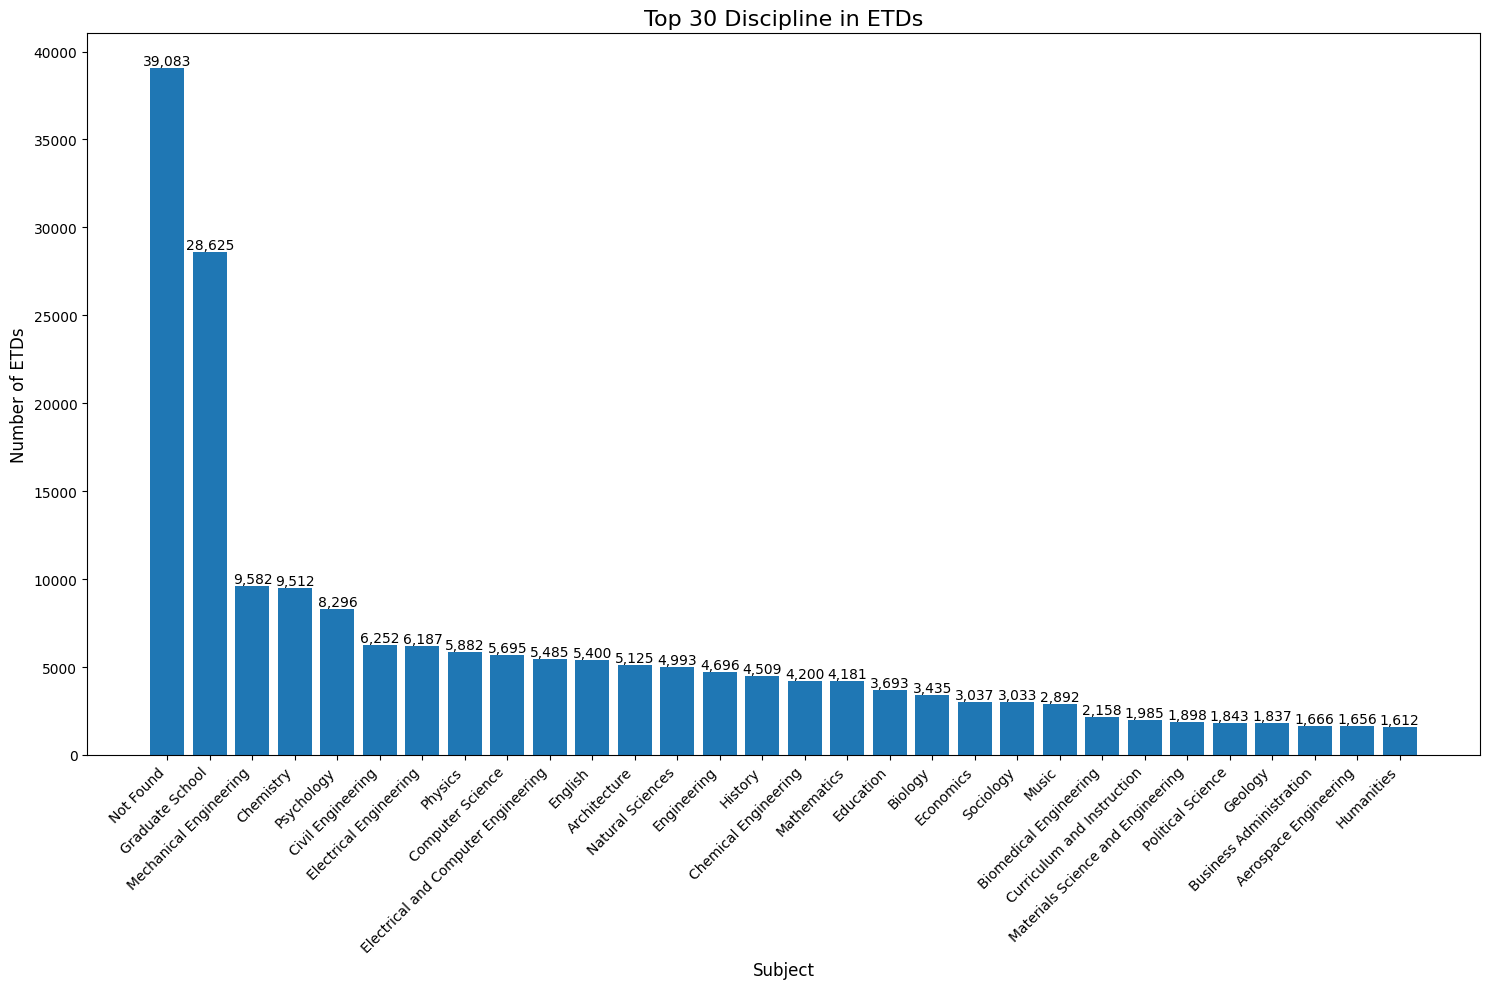

discipline
Not Found                              39083
Graduate School                        28625
Mechanical Engineering                  9582
Chemistry                               9512
Psychology                              8296
Civil Engineering                       6252
Electrical Engineering                  6187
Physics                                 5882
Computer Science                        5695
Electrical and Computer Engineering     5485
English                                 5400
Architecture                            5125
Natural Sciences                        4993
Engineering                             4696
History                                 4509
Chemical Engineering                    4200
Mathematics                             4181
Education                               3693
Biology                                 3435
Economics                               3037
Sociology                               3033
Music                                   2892

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

subject_column = 'discipline'  

# Get the top 30 subjects
top_subjects = df[subject_column].value_counts().nlargest(30)

# Create the bar plot
plt.figure(figsize=(15, 10))
bars = plt.bar(top_subjects.index, top_subjects.values)

# Customize the plot
plt.title('Top 30 Discipline in ETDs', fontsize=16)
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Number of ETDs', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add the number on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Print the data
print(top_subjects)

# Print total number of unique subjects
print(f"\nTotal number of unique subjects: {df[subject_column].nunique()}")

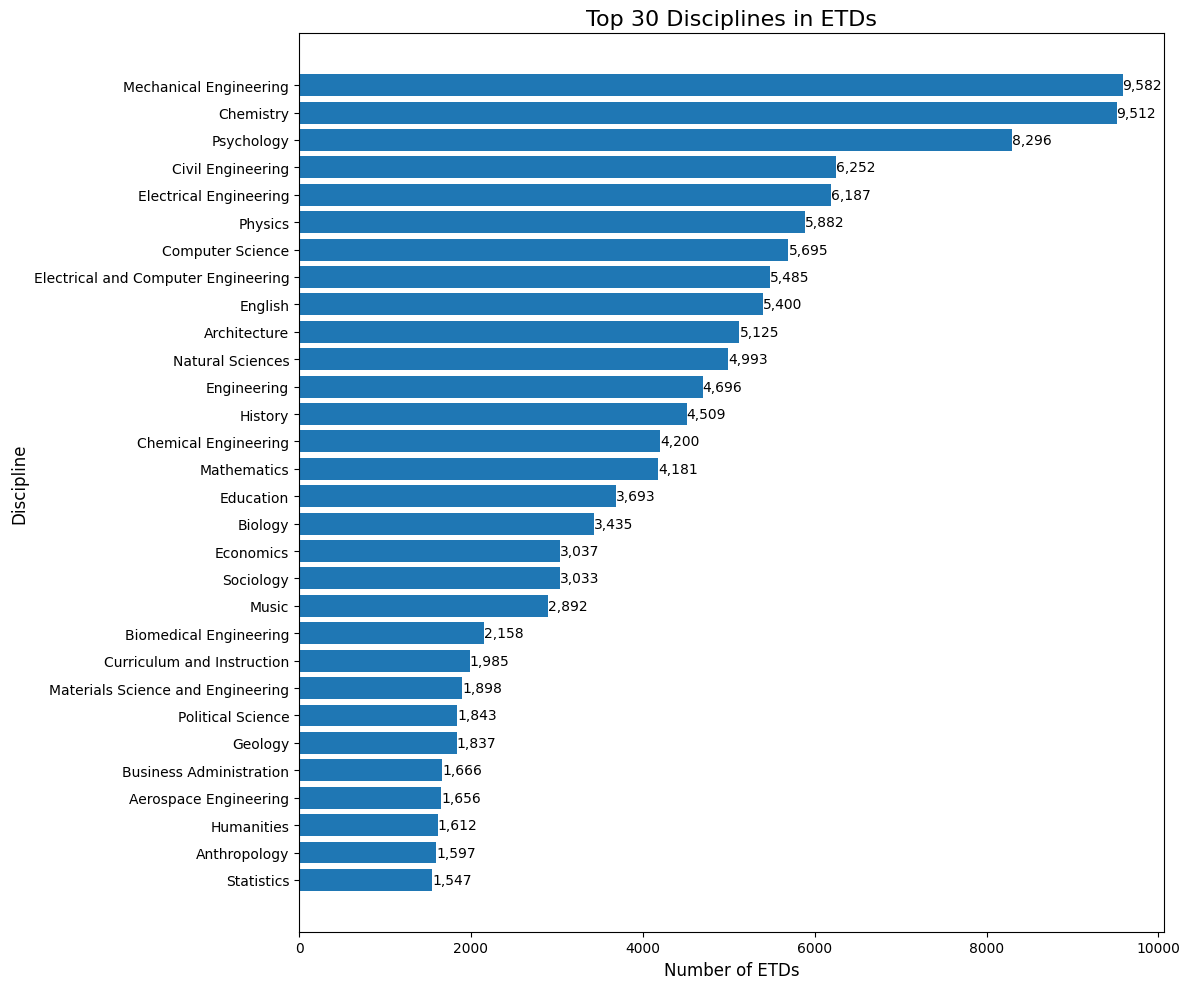

discipline
Mechanical Engineering                 9582
Chemistry                              9512
Psychology                             8296
Civil Engineering                      6252
Electrical Engineering                 6187
Physics                                5882
Computer Science                       5695
Electrical and Computer Engineering    5485
English                                5400
Architecture                           5125
Natural Sciences                       4993
Engineering                            4696
History                                4509
Chemical Engineering                   4200
Mathematics                            4181
Education                              3693
Biology                                3435
Economics                              3037
Sociology                              3033
Music                                  2892
Biomedical Engineering                 2158
Curriculum and Instruction             1985
Materials Science and

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
subject_column = 'discipline'

# Filter out "Not Found" and "Graduate School" entries
df_filtered = df[~df[subject_column].isin(['Not Found', 'Graduate School'])]

# Get the top 30 subjects (excluding "Not Found" and "Graduate School")
top_subjects = df_filtered[subject_column].value_counts().nlargest(30)

# Create the horizontal bar plot
plt.figure(figsize=(12, 10))
bars = plt.barh(top_subjects.index[::-1], top_subjects.values[::-1])  # Reverse order to have largest at top

# Customize the plot
plt.title('Top 30 Disciplines in ETDs', fontsize=16)
plt.xlabel('Number of ETDs', fontsize=12)
plt.ylabel('Discipline', fontsize=12)

# Add the number on each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:,}',
             ha='left', va='center')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Print the data
print(top_subjects)

# Print total number of unique subjects (excluding "Not Found" and "Graduate School")
print(f"\nTotal number of unique disciplines: {df_filtered[subject_column].nunique()}")

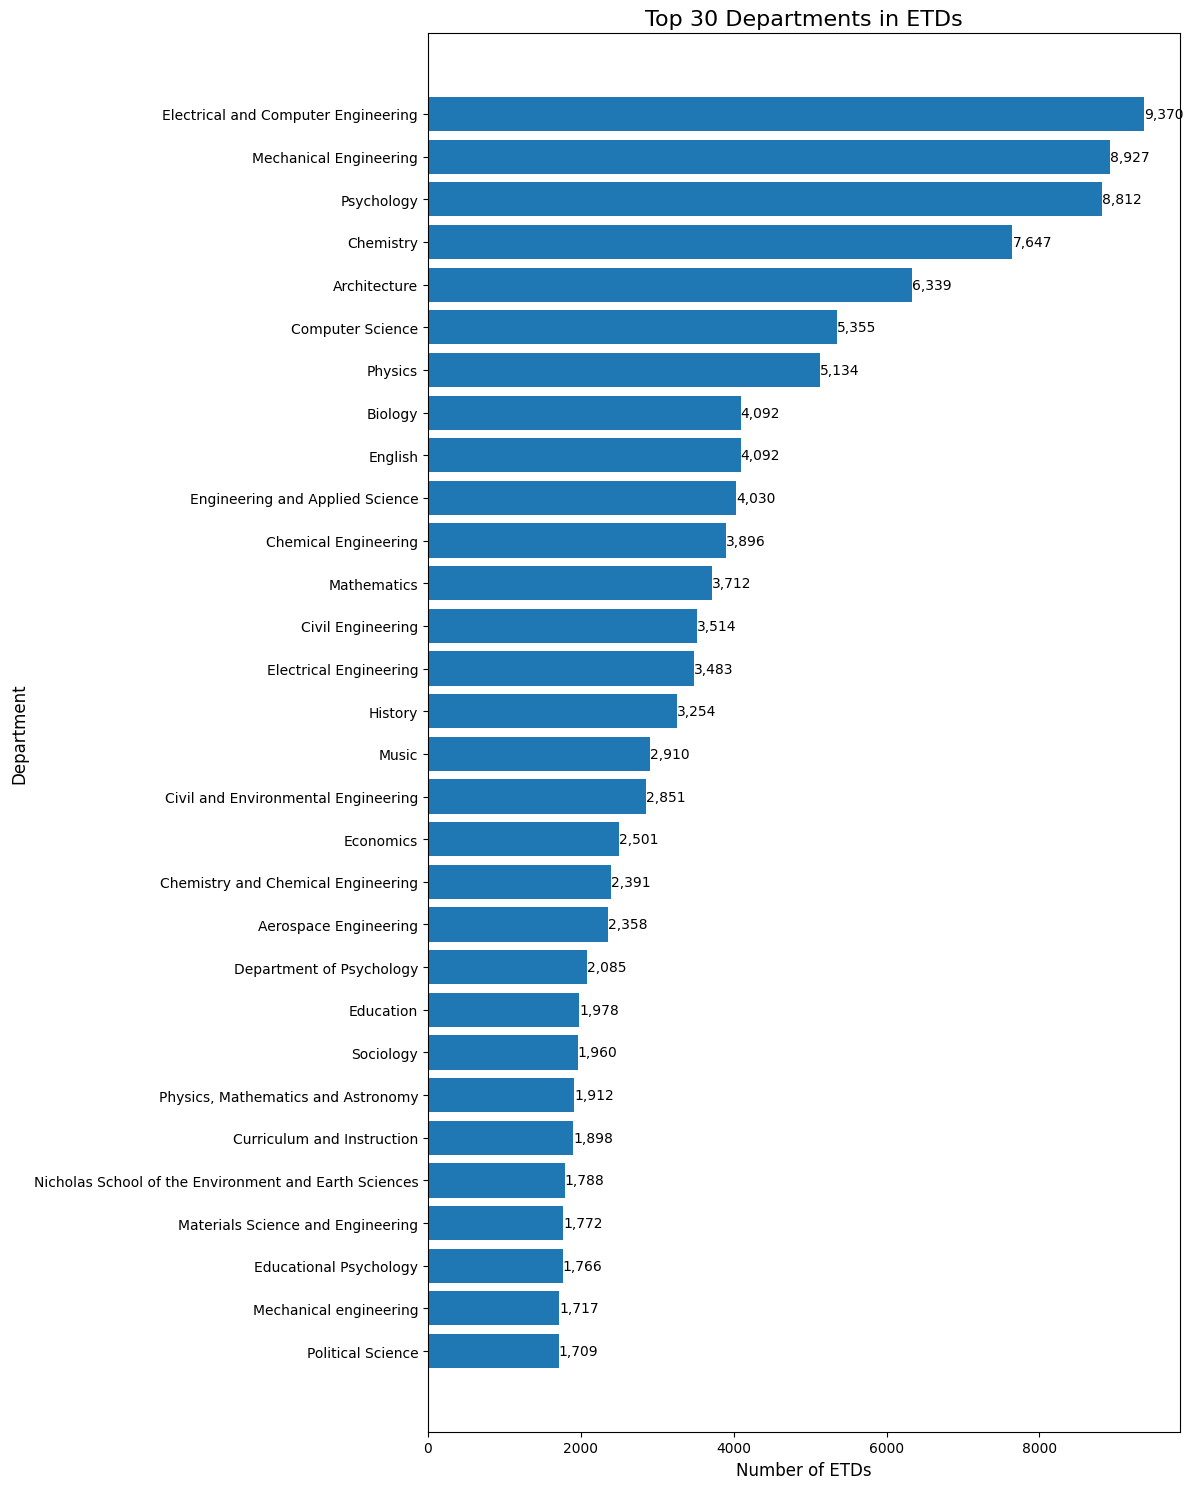

department
Electrical and Computer Engineering                      9370
Mechanical Engineering                                   8927
Psychology                                               8812
Chemistry                                                7647
Architecture                                             6339
Computer Science                                         5355
Physics                                                  5134
Biology                                                  4092
English                                                  4092
Engineering and Applied Science                          4030
Chemical Engineering                                     3896
Mathematics                                              3712
Civil Engineering                                        3514
Electrical Engineering                                   3483
History                                                  3254
Music                                                    29

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

subject_column = 'department'  # Change this to the appropriate column name

# Get the top 30 departments
top_subjects = df[subject_column].value_counts().nlargest(30)

# Create the horizontal bar plot
plt.figure(figsize=(12, 15))  # Adjusted figure size for better fit
bars = plt.barh(top_subjects.index[::-1], top_subjects.values[::-1])  # Reverse order to have largest at top

# Customize the plot
plt.title('Top 30 Departments in ETDs', fontsize=16)
plt.xlabel('Number of ETDs', fontsize=12)
plt.ylabel('Department', fontsize=12)

# Add the number on each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:,}',
             ha='left', va='center')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Print the data
print(top_subjects)

# Print total number of unique departments
print(f"\nTotal number of unique departments: {df[subject_column].nunique()}")

Number of different degree types: 1213

Top 10 degree types:
degree
Doctor of Philosophy          84487
Master of Science             48775
Ph.D.                         48052
M.S.                          22766
Master of Arts                12835
Ph. D.                        12303
MS                             8890
Doctor of Philosophy (PhD)     8286
PhD                            8275
M.A.                           6697
Name: count, dtype: int64


/var/folders/n8/pd7j7g0j3673x8rwthf6b1dh0000gn/T/ipykernel_35490/413472956.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['degree_category'] = df_filtered['degree'].apply(categorize_degree)


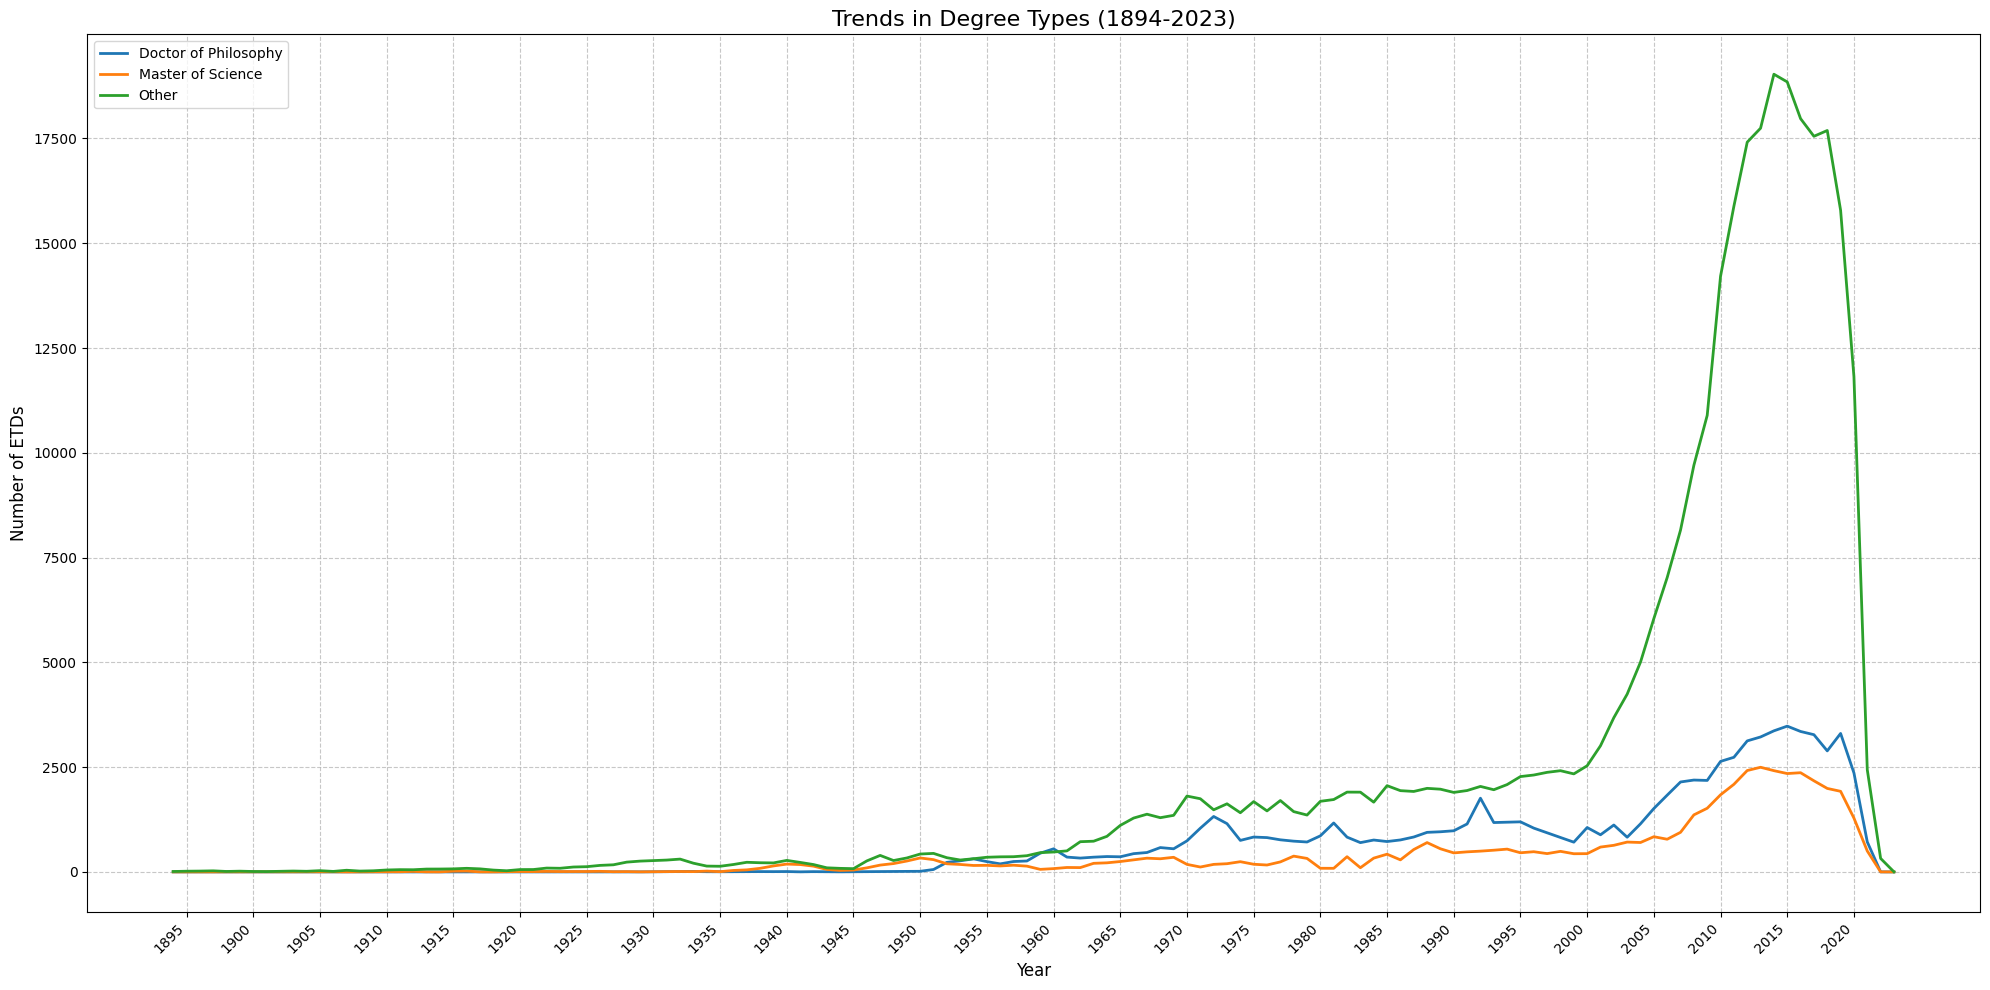

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Convert year to numeric, dropping any non-numeric values
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Filter for years between 1894 and 2023
df_filtered = df[(df['year'] >= 1894) & (df['year'] <= 2023)]

# Get the count of each degree type
degree_counts = df_filtered['degree'].value_counts()

print("Number of different degree types:", len(degree_counts))
print("\nTop 10 degree types:")
print(degree_counts.head(10))

# Get the top two degrees
top_two_degrees = degree_counts.nlargest(2).index.tolist()

# Function to categorize degrees
def categorize_degree(degree):
    if degree == top_two_degrees[0]:
        return top_two_degrees[0]
    elif degree == top_two_degrees[1]:
        return top_two_degrees[1]
    else:
        return 'Other'

# Apply categorization
df_filtered['degree_category'] = df_filtered['degree'].apply(categorize_degree)

# Group by year and degree category
degree_trends = df_filtered.groupby(['year', 'degree_category']).size().unstack(fill_value=0)

# Create the line plot
plt.figure(figsize=(20, 10))

# Plot each degree category
plt.plot(degree_trends.index, degree_trends[top_two_degrees[0]], label=top_two_degrees[0], linewidth=2)
plt.plot(degree_trends.index, degree_trends[top_two_degrees[1]], label=top_two_degrees[1], linewidth=2)
plt.plot(degree_trends.index, degree_trends['Other'], label='Other', linewidth=2)

# Customize the plot
plt.title('Trends in Degree Types (1894-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of ETDs', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-axis ticks to show every 5 years
plt.xticks(range(1895, 2024, 5), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/n8/pd7j7g0j3673x8rwthf6b1dh0000gn/T/ipykernel_35490/2069706559.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['normalized_degree'] = df_filtered['degree'].apply(normalize_degree)
/var/folders/n8/pd7j7g0j3673x8rwthf6b1dh0000gn/T/ipykernel_35490/2069706559.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['degree_category'] = df_filtered['normalized_degree'].apply(categorize_degree)


Number of different degree types after normalization: 684

Top 10 degree types after normalization:
normalized_degree
Doctor of Philosophy      176934
Master of Science         104859
Unknown                    87106
master of arts             12838
m.a.                        6697
master of arts (ma)         2818
doctor of education         2818
ed.d.                       2430
ma                          2296
master of architecture      1772
Name: count, dtype: int64


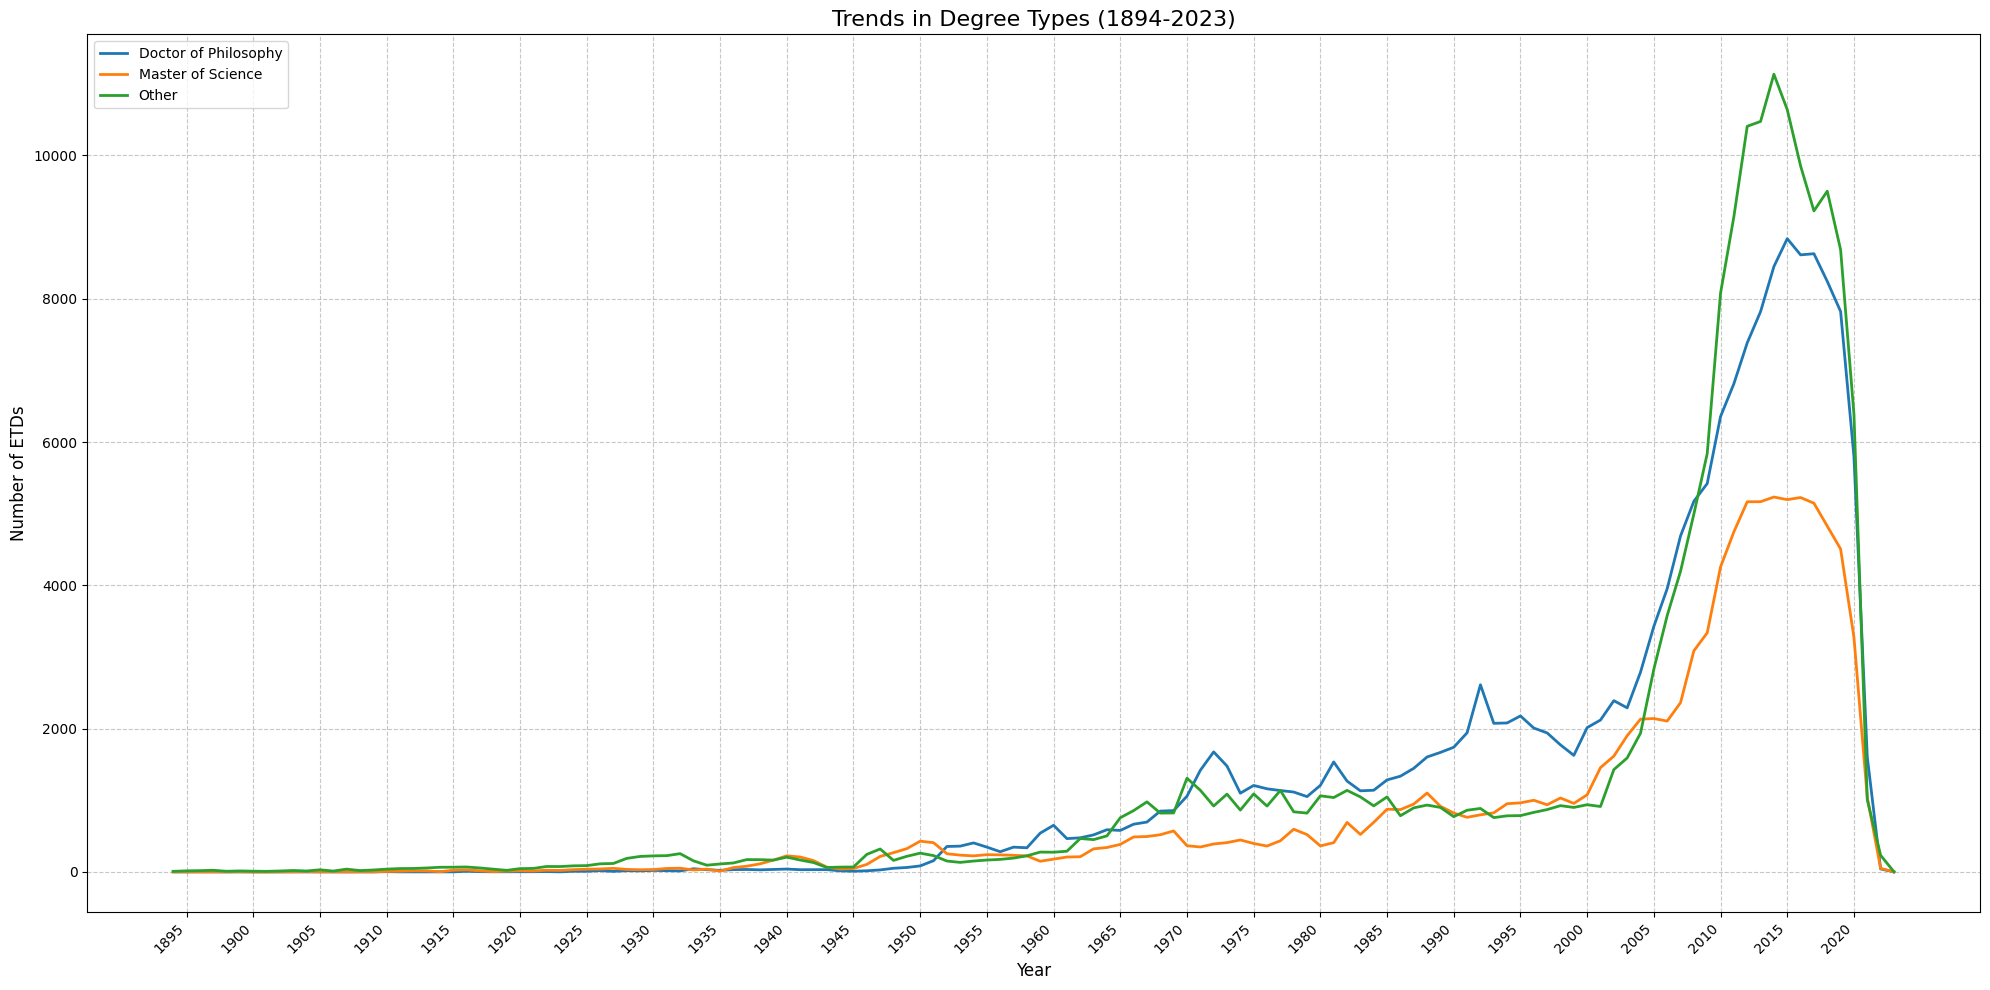

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Convert year to numeric, dropping any non-numeric values
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Filter for years between 1894 and 2023
df_filtered = df[(df['year'] >= 1894) & (df['year'] <= 2023)]

# Function to normalize degree names
def normalize_degree(degree):
    if pd.isna(degree):
        return 'Unknown'
    degree = str(degree).lower()
    if any(phd in degree for phd in ['doctor of philosophy', 'ph.d', 'phd', 'ph. d.']):
        return 'Doctor of Philosophy'
    elif any(ms in degree for ms in ['master of science', 'm.s', 'ms', 's.m.']):
        return 'Master of Science'
    else:
        return degree

# Normalize degree names
df_filtered['normalized_degree'] = df_filtered['degree'].apply(normalize_degree)

# Get the count of each normalized degree type
degree_counts = df_filtered['normalized_degree'].value_counts()

print("Number of different degree types after normalization:", len(degree_counts))
print("\nTop 10 degree types after normalization:")
print(degree_counts.head(10))

# Get the top two degrees
top_two_degrees = degree_counts.nlargest(2).index.tolist()

# Function to categorize degrees
def categorize_degree(degree):
    if degree in top_two_degrees:
        return degree
    else:
        return 'Other'

# Apply categorization
df_filtered['degree_category'] = df_filtered['normalized_degree'].apply(categorize_degree)

# Group by year and degree category
degree_trends = df_filtered.groupby(['year', 'degree_category']).size().unstack(fill_value=0)

# Create the line plot
plt.figure(figsize=(20, 10))

# Plot each degree category
for category in top_two_degrees + ['Other']:
    plt.plot(degree_trends.index, degree_trends[category], label=category, linewidth=2)

# Customize the plot
plt.title('Trends in Degree Types (1894-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of ETDs', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-axis ticks to show every 5 years
plt.xticks(range(1895, 2024, 5), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/n8/pd7j7g0j3673x8rwthf6b1dh0000gn/T/ipykernel_35490/1958829717.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['normalized_degree'] = df_filtered['degree'].apply(normalize_degree)


Number of different degree types after normalization: 683

Top 10 degree types after normalization:
normalized_degree
Doctor of Philosophy      176934
Master of Science         104859
master of arts             12838
m.a.                        6697
master of arts (ma)         2818
doctor of education         2818
ed.d.                       2430
ma                          2296
master of architecture      1772
master of fine arts         1666
Name: count, dtype: int64


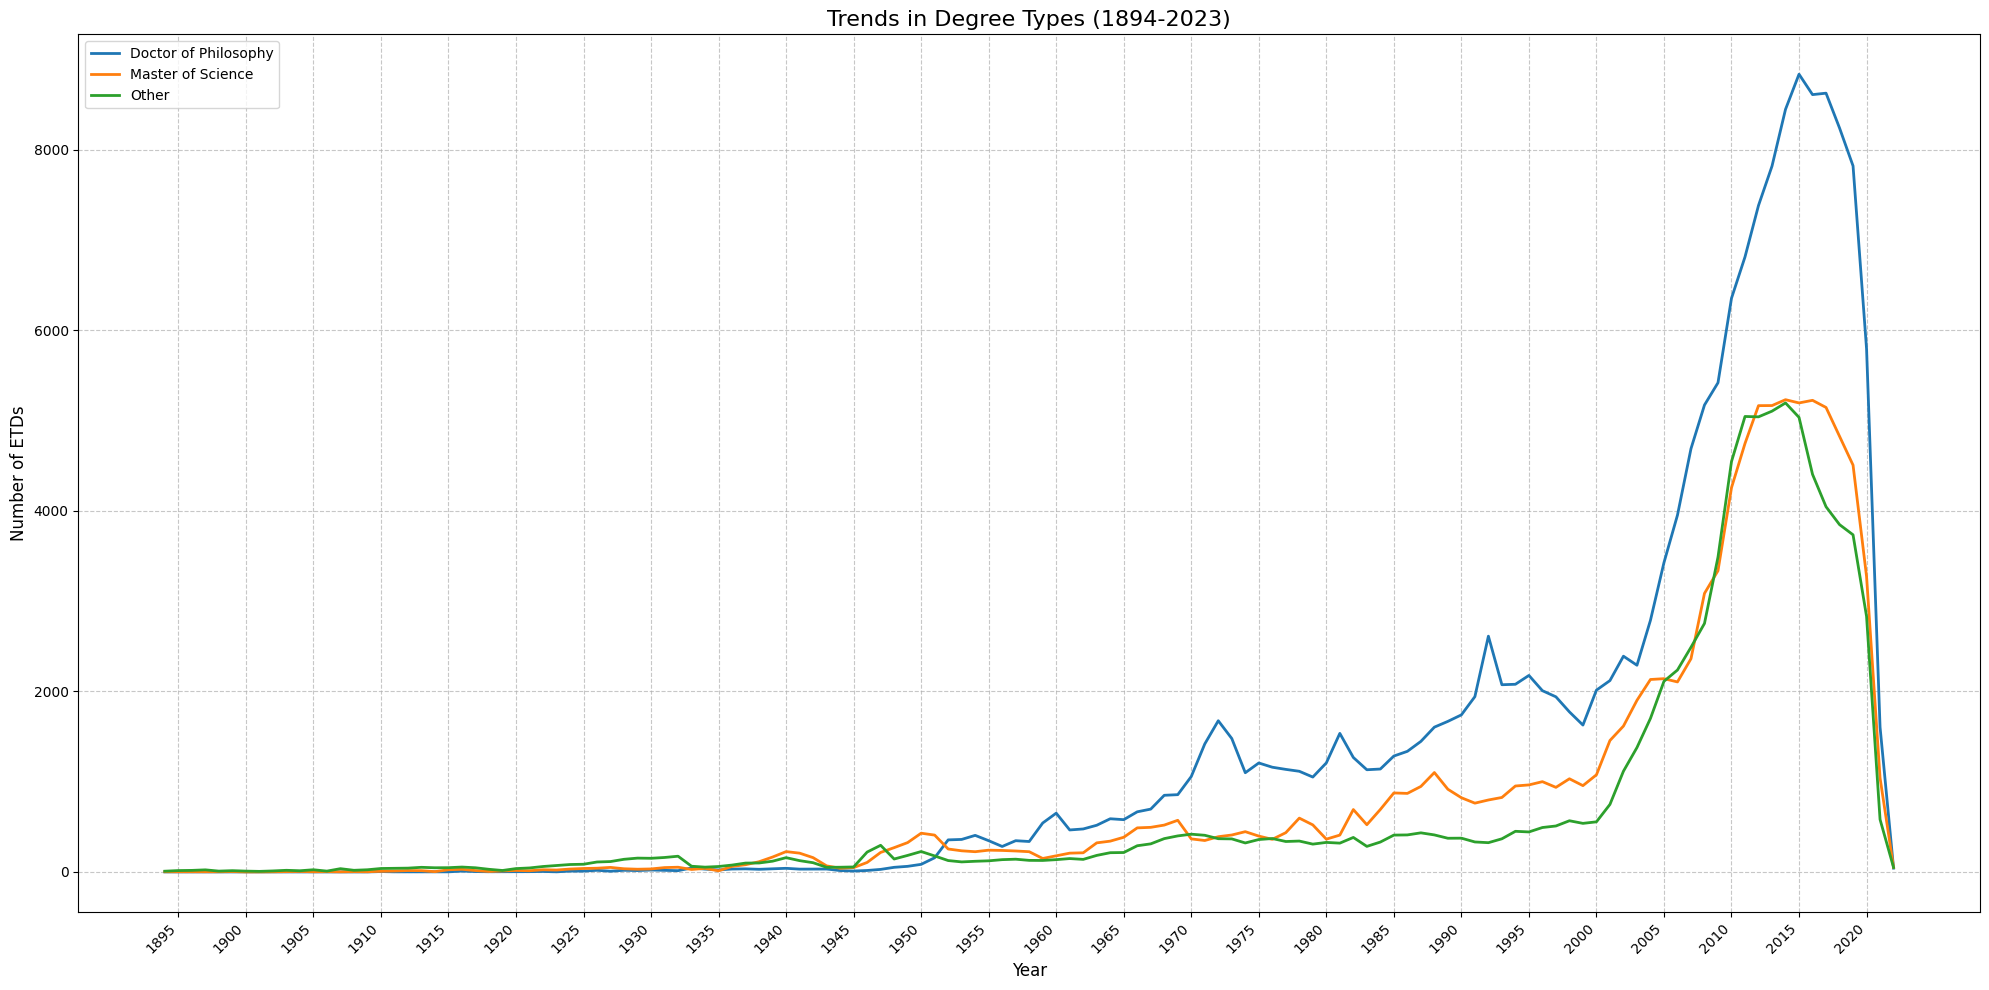

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Convert year to numeric, dropping any non-numeric values
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Filter for years between 1894 and 2023
df_filtered = df[(df['year'] >= 1894) & (df['year'] <= 2023)]

# Function to normalize degree names
def normalize_degree(degree):
    if pd.isna(degree):
        return None  # Changed from 'Unknown' to None
    degree = str(degree).lower()
    if any(phd in degree for phd in ['doctor of philosophy', 'ph.d', 'phd', 'ph. d.']):
        return 'Doctor of Philosophy'
    elif any(ms in degree for ms in ['master of science', 'm.s', 'ms', 's.m.']):
        return 'Master of Science'
    else:
        return degree

# Normalize degree names
df_filtered['normalized_degree'] = df_filtered['degree'].apply(normalize_degree)

# Remove rows with None (unknown) degrees
df_filtered = df_filtered.dropna(subset=['normalized_degree'])

# Get the count of each normalized degree type
degree_counts = df_filtered['normalized_degree'].value_counts()
print("Number of different degree types after normalization:", len(degree_counts))
print("\nTop 10 degree types after normalization:")
print(degree_counts.head(10))

# Get the top two degrees
top_two_degrees = degree_counts.nlargest(2).index.tolist()

# Function to categorize degrees
def categorize_degree(degree):
    if degree in top_two_degrees:
        return degree
    else:
        return 'Other'

# Apply categorization
df_filtered['degree_category'] = df_filtered['normalized_degree'].apply(categorize_degree)

# Group by year and degree category
degree_trends = df_filtered.groupby(['year', 'degree_category']).size().unstack(fill_value=0)

# Create the line plot
plt.figure(figsize=(20, 10))

# Plot each degree category
for category in top_two_degrees + ['Other']:
    plt.plot(degree_trends.index, degree_trends[category], label=category, linewidth=2)

# Customize the plot
plt.title('Trends in Degree Types (1894-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of ETDs', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-axis ticks to show every 5 years
plt.xticks(range(1895, 2024, 5), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [27]:
pip install pandas matplotlib wordcloud nltk

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 kB 3.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Download the stopwords dataset if you haven't already
nltk.download('stopwords')

# Load your data
df = pd.read_csv('ETDs_sept23.csv')

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        return ' '.join(words)
    return ''

# Preprocess titles and abstracts
df['processed_title'] = df['title'].apply(preprocess_text)
df['processed_abstract'] = df['abstract'].apply(preprocess_text)

# Function to create and save word cloud
def create_wordcloud(text, title, filename):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout(pad=0)
    plt.savefig(filename)
    plt.close()

# Create word clouds
create_wordcloud(' '.join(df['processed_title']), 'Word Cloud of Titles', 'title_wordcloud.png')
create_wordcloud(' '.join(df['processed_abstract']), 'Word Cloud of Abstracts', 'abstract_wordcloud.png')

# Function to get most common words
def get_most_common_words(text, n=20):
    words = text.split()
    word_counts = Counter(words)
    return word_counts.most_common(n)

# Get most common words in titles and abstracts
title_common_words = get_most_common_words(' '.join(df['processed_title']))
abstract_common_words = get_most_common_words(' '.join(df['processed_abstract']))

# Function to plot frequency distribution
def plot_frequency_distribution(word_counts, title, filename):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# Plot frequency distributions
plot_frequency_distribution(title_common_words, 'Most Common Words in Titles', 'title_frequency.png')
plot_frequency_distribution(abstract_common_words, 'Most Common Words in Abstracts', 'abstract_frequency.png')

# Print most common words
print("Most common words in titles:")
print(title_common_words)
print("\nMost common words in abstracts:")
print(abstract_common_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amirawu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/var/folders/n8/pd7j7g0j3673x8rwthf6b1dh0000gn/T/ipykernel_35490/1117106917.py:13: DtypeWarning: Columns (0,1,5,10,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ETDs_sept23.csv')


KeyboardInterrupt: 

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Download the stopwords dataset if you haven't already
nltk.download('stopwords')

# Load your data
df = pd.read_csv('ETDs_sept23.csv')

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        return ' '.join(words)
    return ''

# Preprocess titles
df['processed_title'] = df['title'].apply(preprocess_text)

# Function to create and save word cloud
def create_wordcloud(text, title, filename):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout(pad=0)
    plt.savefig(filename)
    plt.close()

# Create word cloud for titles
create_wordcloud(' '.join(df['processed_title']), 'Word Cloud of Titles', 'title_wordcloud.png')

# Function to get most common words
def get_most_common_words(text, n=20):
    words = text.split()
    word_counts = Counter(words)
    return word_counts.most_common(n)

# Get most common words in titles
title_common_words = get_most_common_words(' '.join(df['processed_title']))

# Function to plot frequency distribution
def plot_frequency_distribution(word_counts, title, filename):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# Plot frequency distribution for titles
plot_frequency_distribution(title_common_words, 'Most Common Words in Titles', 'title_frequency.png')

# Print most common words in titles
print("Most common words in titles:")
print(title_common_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amirawu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/n8/pd7j7g0j3673x8rwthf6b1dh0000gn/T/ipykernel_35490/2152327622.py:13: DtypeWarning: Columns (0,1,5,10,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ETDs_sept23.csv')


Most common words in titles:
[('study', 32904), ('analysis', 30853), ('effects', 22320), ('using', 21972), ('development', 20858), ('design', 16019), ('systems', 13777), ('system', 12891), ('effect', 12124), ('school', 12015), ('model', 11962), ('performance', 11812), ('students', 11238), ('high', 11147), ('modeling', 10905), ('control', 10674), ('role', 10628), ('education', 10483), ('characterization', 10241), ('evaluation', 10194)]


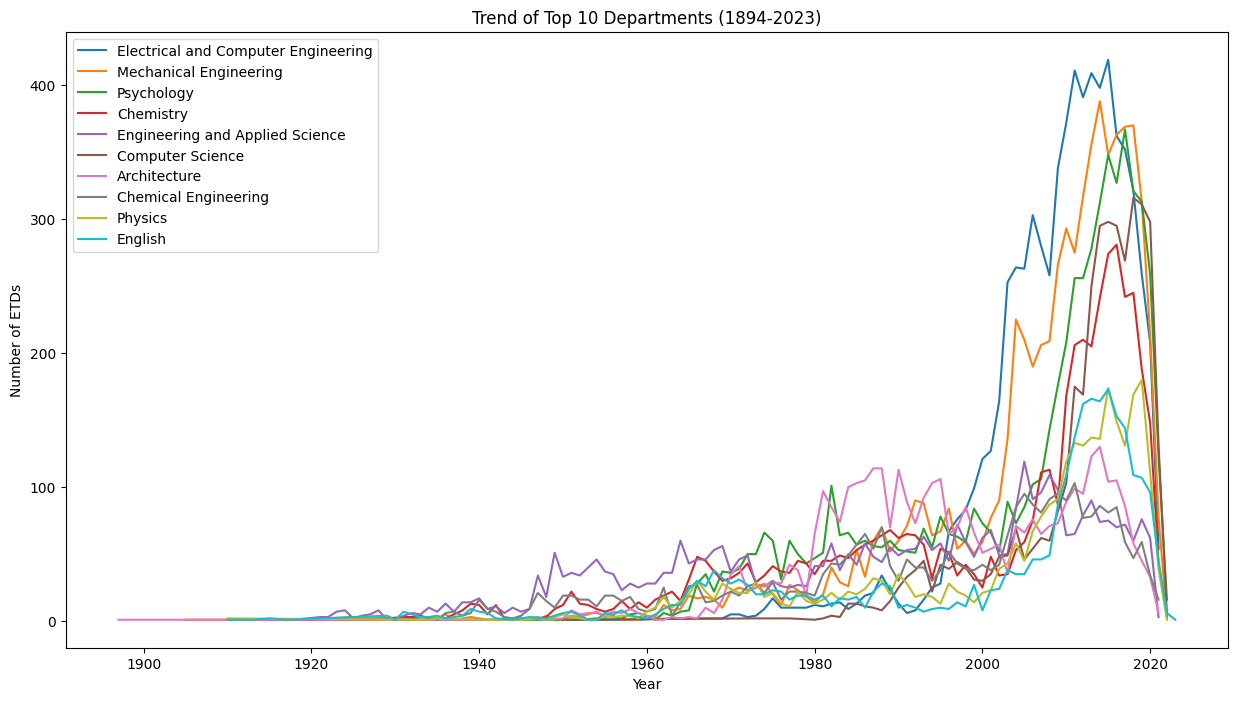

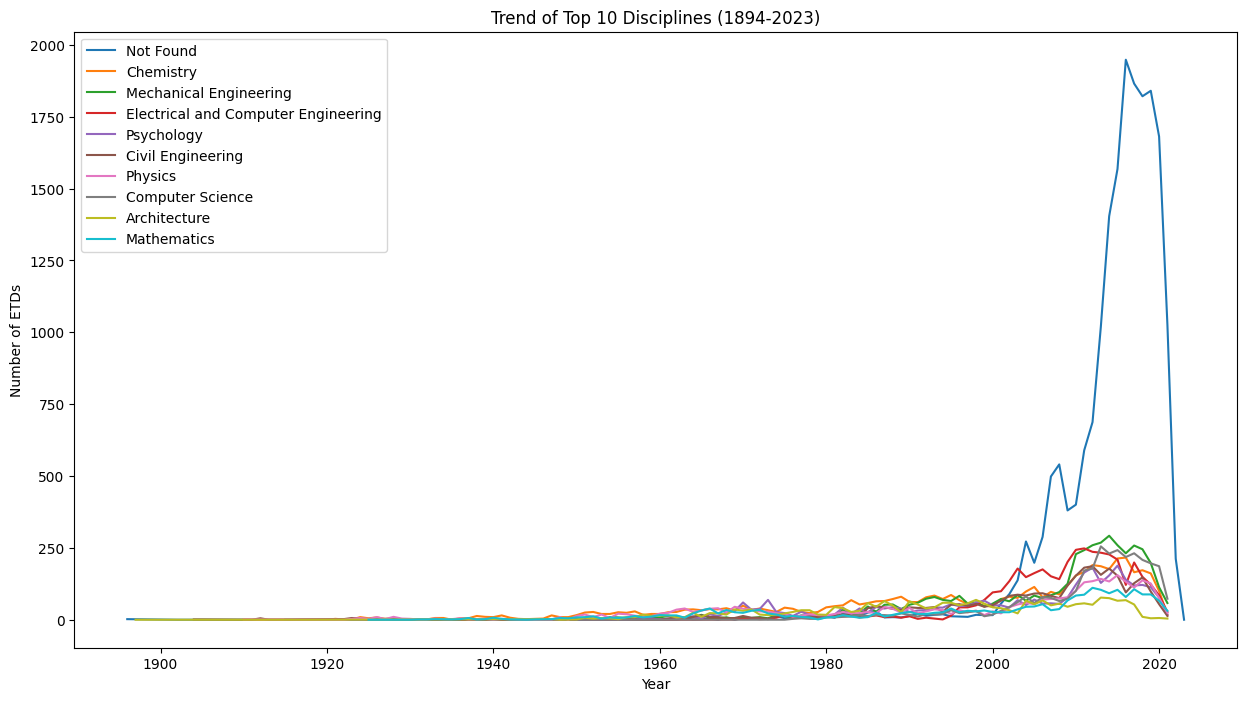

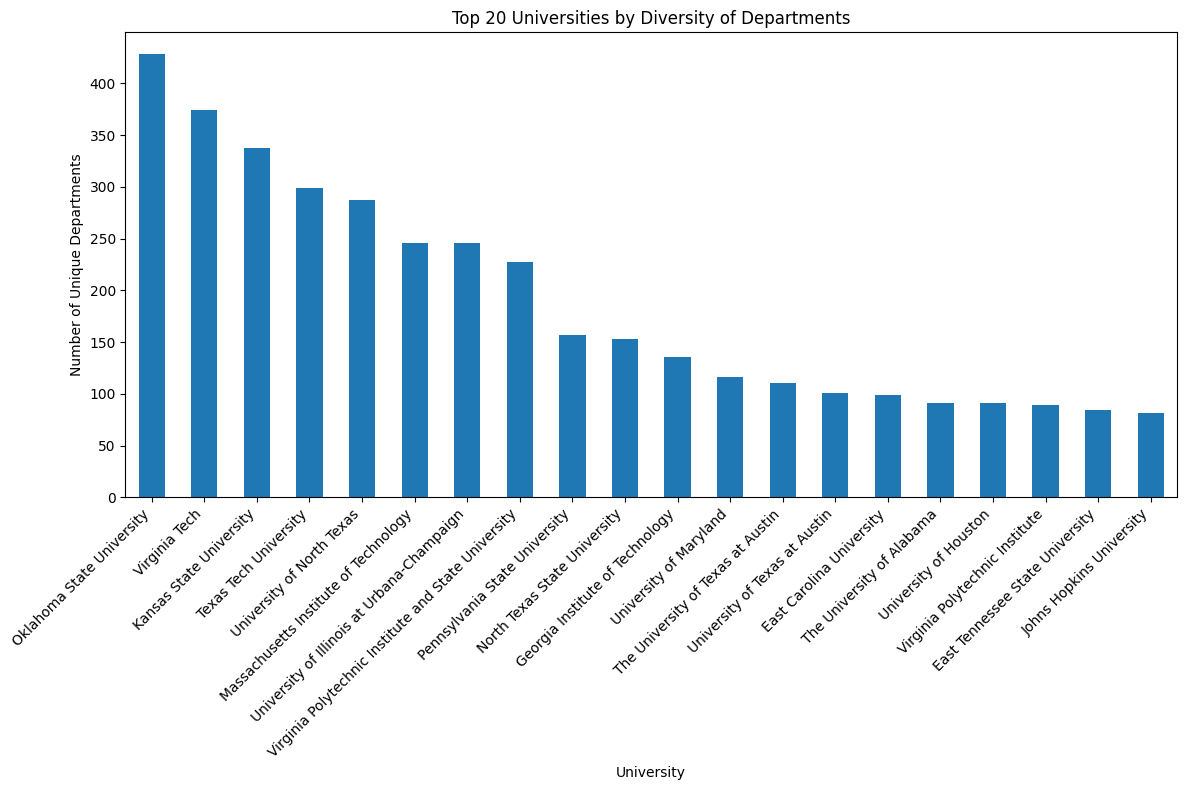

Total number of ETDs (1894-2023): 229509
Date range of ETDs: 1894 to 2023
Number of unique universities: 81
Number of unique departments: 3011

Top 5 universities by number of ETDs:
university
Virginia Tech                                 29007
Georgia Institute of Technology               22379
The University of Texas at Austin             17117
University of Illinois at Urbana-Champaign    13908
Texas Tech University                         13456
Name: count, dtype: int64

Top 5 departments by number of ETDs:
department
Electrical and Computer Engineering    7008
Mechanical Engineering                 6836
Psychology                             6250
Chemistry                              4977
Engineering and Applied Science        4030
Name: count, dtype: int64


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert year to numeric and filter for the range 1894-2023
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df_filtered = df[(df['year'] >= 1894) & (df['year'] <= 2023)].dropna(subset=['year', 'department', 'university'])
df_filtered['year'] = df_filtered['year'].astype(int)

# 1. Time-based analysis of top topics
plt.figure(figsize=(15, 8))
top_departments = df_filtered['department'].value_counts().nlargest(10).index

for dept in top_departments:
    dept_data = df_filtered[df_filtered['department'] == dept]
    dept_counts = dept_data.groupby('year').size()
    plt.plot(dept_counts.index, dept_counts.values, label=dept)

plt.title('Trend of Top 10 Departments (1894-2023)')
plt.xlabel('Year')
plt.ylabel('Number of ETDs')
plt.legend()
plt.show()

# 2. Time-based analysis of top disciplines
plt.figure(figsize=(15, 8))
top_disciplines = df_filtered['discipline'].value_counts().nlargest(10).index

for dept in top_disciplines:
    dept_data = df_filtered[df_filtered['discipline'] == dept]
    dept_counts = dept_data.groupby('year').size()
    plt.plot(dept_counts.index, dept_counts.values, label=dept)

plt.title('Trend of Top 10 Disciplines (1894-2023)')
plt.xlabel('Year')
plt.ylabel('Number of ETDs')
plt.legend()
plt.show()

# # 2. University-based analysis of top topics
# top_universities = df_filtered['university'].value_counts().nlargest(10).index
# uni_dept_counts = df_filtered[df_filtered['university'].isin(top_universities)].groupby('university')['department'].value_counts().unstack().fillna(0)

# plt.figure(figsize=(15, 10))
# sns.heatmap(uni_dept_counts, annot=True, fmt='g', cmap='YlOrRd')
# plt.title('Top Departments in Top 10 Universities (1894-2023)')
# plt.ylabel('University')
# plt.xlabel('Department')
# plt.tight_layout()
# plt.show()

# # 3. Trend analysis of top topics over time
# plt.figure(figsize=(15, 8))
# df_filtered['decade'] = (df_filtered['year'] // 10) * 10
# topic_trends = df_filtered.groupby(['decade', 'department']).size().unstack()

# for dept in top_departments:
#     plt.plot(topic_trends.index, topic_trends[dept], label=dept)

# plt.title('Trend of Top 5 Departments Over Decades (1894-2023)')
# plt.xlabel('Decade')
# plt.ylabel('Number of ETDs')
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()

# 4. Correlation between university ranking and diversity of topics
university_topic_diversity = df_filtered.groupby('university')['department'].nunique().sort_values(ascending=False)
top_diverse_universities = university_topic_diversity.nlargest(20)

plt.figure(figsize=(12, 8))
top_diverse_universities.plot(kind='bar')
plt.title('Top 20 Universities by Diversity of Departments')
plt.xlabel('University')
plt.ylabel('Number of Unique Departments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print some summary statistics
print(f"Total number of ETDs (1894-2023): {len(df_filtered)}")
print(f"Date range of ETDs: 1894 to 2023")
print(f"Number of unique universities: {df_filtered['university'].nunique()}")
print(f"Number of unique departments: {df_filtered['department'].nunique()}")
print("\nTop 5 universities by number of ETDs:")
print(df_filtered['university'].value_counts().nlargest(5))
print("\nTop 5 departments by number of ETDs:")
print(df_filtered['department'].value_counts().nlargest(5))

/var/folders/n8/pd7j7g0j3673x8rwthf6b1dh0000gn/T/ipykernel_38853/2755516675.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_dept_percentages = df_filtered[df_filtered['department'].isin(top_departments)].groupby(['period', 'department']).size().unstack()


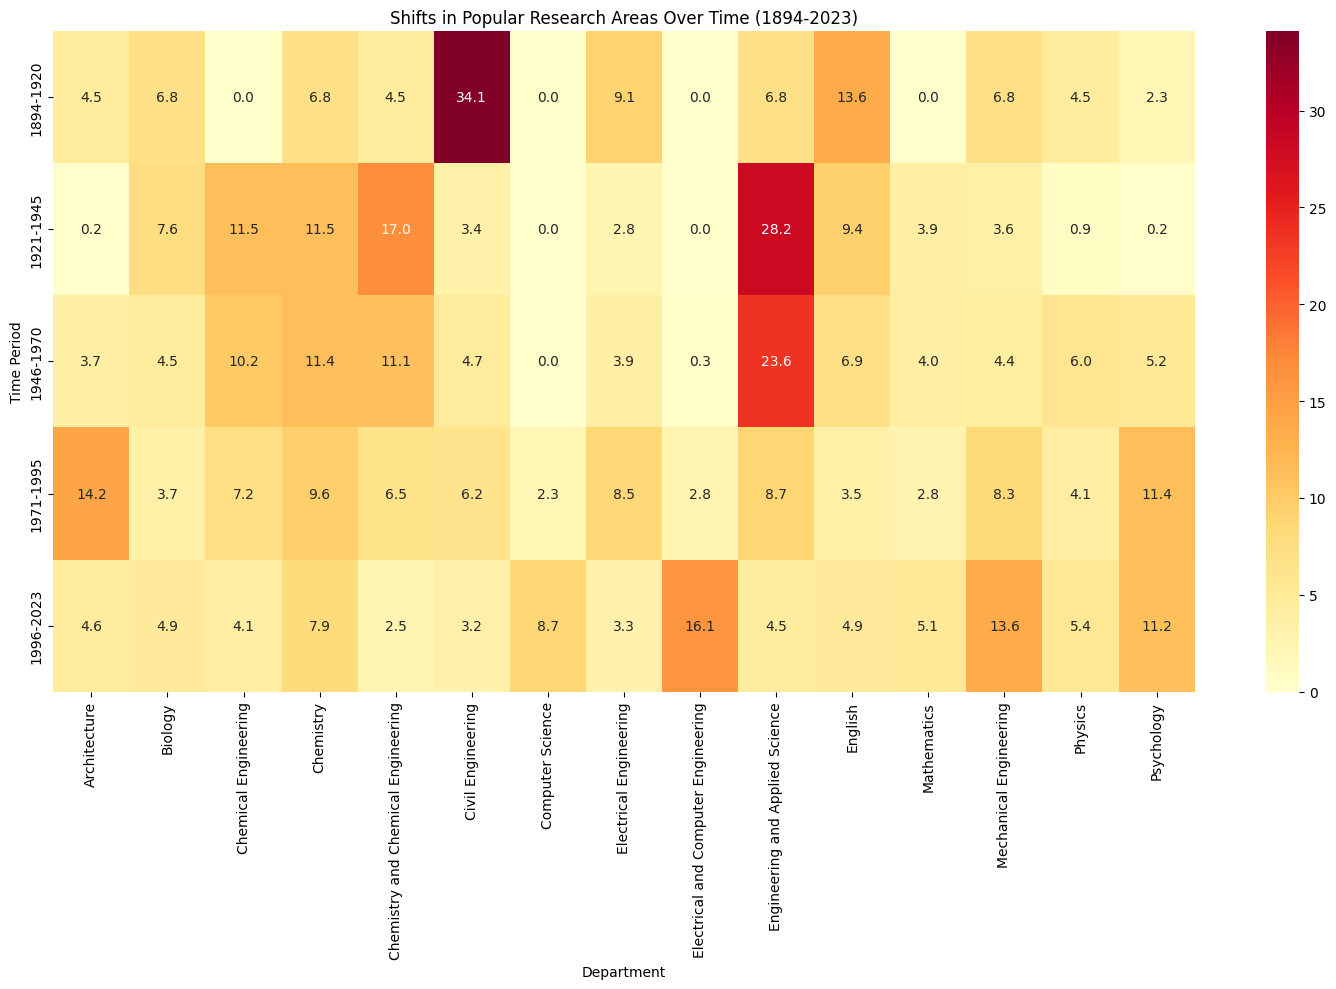

Departments with the largest increase in popularity:
department
Electrical and Computer Engineering    16.113951
Psychology                              8.918862
Computer Science                        8.732831
Mechanical Engineering                  6.752226
Mathematics                             5.106465
dtype: float64

Departments with the largest decrease in popularity:
department
Civil Engineering                    -30.864243
English                               -8.733382
Electrical Engineering                -5.810950
Engineering and Applied Science       -2.360925
Chemistry and Chemical Engineering    -2.028558
dtype: float64


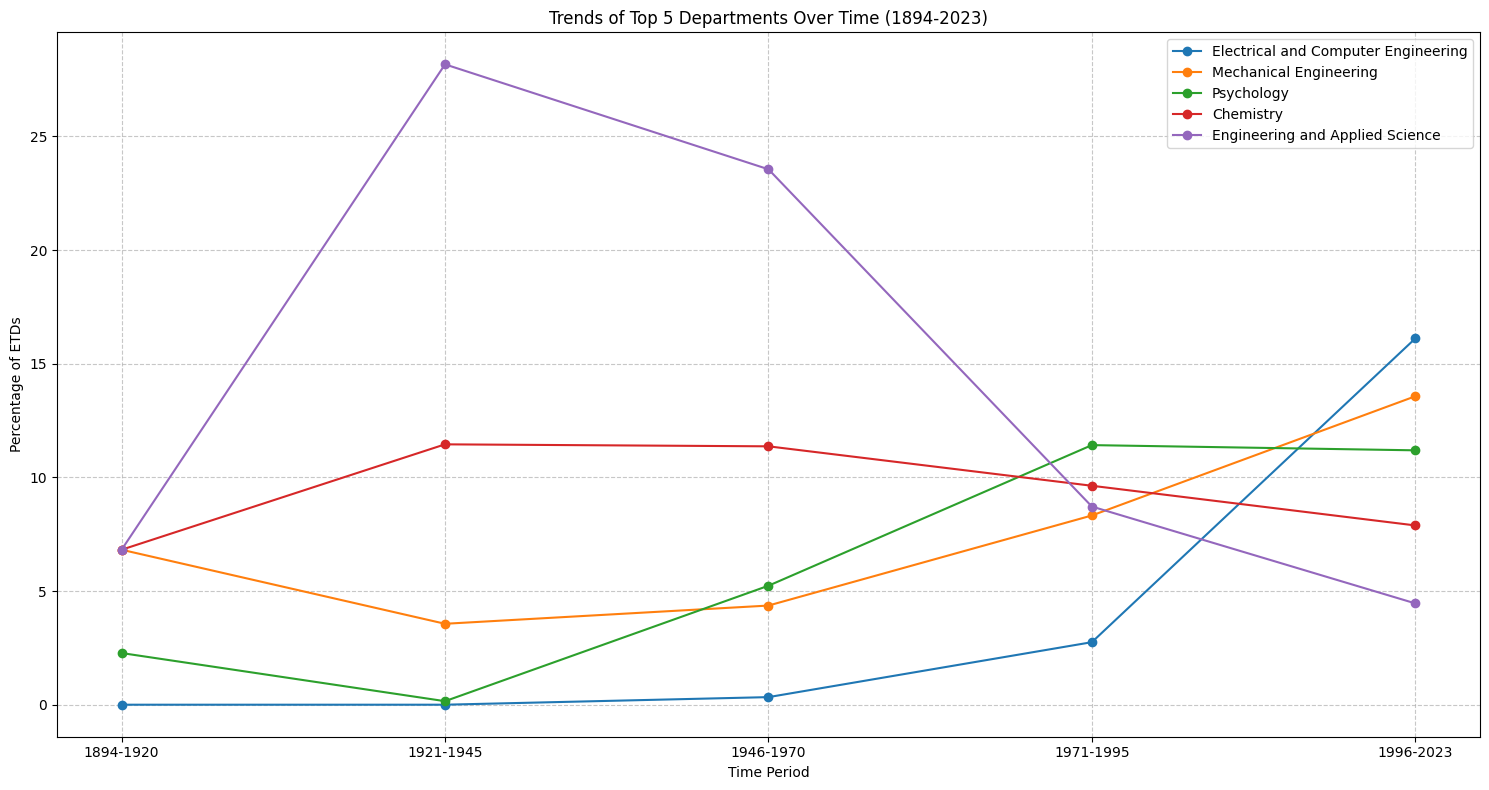

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_filtered is your dataframe with data from 1894 to 2023

# Create time periods
df_filtered['period'] = pd.cut(df_filtered['year'], 
                               bins=[1894, 1920, 1945, 1970, 1995, 2023],
                               labels=['1894-1920', '1921-1945', '1946-1970', '1971-1995', '1996-2023'])

# Get top 15 departments overall
top_departments = df_filtered['department'].value_counts().nlargest(15).index

# Calculate percentage of ETDs for each department in each period
period_dept_percentages = df_filtered[df_filtered['department'].isin(top_departments)].groupby(['period', 'department']).size().unstack()
period_dept_percentages = period_dept_percentages.div(period_dept_percentages.sum(axis=1), axis=0) * 100

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(period_dept_percentages, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Shifts in Popular Research Areas Over Time (1894-2023)')
plt.ylabel('Time Period')
plt.xlabel('Department')
plt.tight_layout()
plt.show()

# Calculate and print the departments with the biggest increase and decrease
first_period = period_dept_percentages.iloc[0]
last_period = period_dept_percentages.iloc[-1]
changes = last_period - first_period

print("Departments with the largest increase in popularity:")
print(changes.nlargest(5))
print("\nDepartments with the largest decrease in popularity:")
print(changes.nsmallest(5))

# Plot line graph for top 5 departments
plt.figure(figsize=(15, 8))
top_5_departments = df_filtered['department'].value_counts().nlargest(5).index

for dept in top_5_departments:
    dept_data = period_dept_percentages[dept]
    plt.plot(dept_data.index, dept_data.values, marker='o', label=dept)

plt.title('Trends of Top 5 Departments Over Time (1894-2023)')
plt.xlabel('Time Period')
plt.ylabel('Percentage of ETDs')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()